In [245]:
import numpy as np
from numpy.linalg import matrix_rank
from sympy import Matrix
from scipy.linalg import null_space
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math 

from mpltools import annotation


## Computational Mathematics

## 2021/22 Assessment

## Release: 10AM Thursday 11th November 2021 <a class="tocSkip">

## Deadline: 5PM Friday 12th November 2021 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module "Computational Mathematics" for year 2021/22.


- This is independent work, you cannot work in groups.


- Each of the four questions below is equally weighted in terms of marks.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use any library we used in lectures, and you may reuse any code from lectures and homeworks. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - **please submit a version where you have run all of the cells and all the outputs/plots etc are visible without the marker having to run the notebook themselves**.
    
    
- Even if you're not completely sure how to complete a part of the question, my advice is to submit something, even if its just your ideas on how to go about answering the question, as you could well score some valuable marks.


- Where I say "**pen and paper**" in some of the questions below I mean that I want you derive a result or perform a task yourself mathematically rather than relying on a computational solution. 


- If you are happy to write down your mathematical work in the form of Latex directly within this notebook then feel free to do this - you do not need to actually use a pen and paper where I say "pen and paper".


- Alternatively you may if you choose submit parts of your answers via **scans or photos of hand written pages** - feel free to use this option in particular for supplementary sketches, equations or where I have asked you to complete a task with "pen and paper". You will not be marked down for not embedding equations into your markdown cells. Please make sure that the question number each sheet you scan refers to is very clear. 

# Question 1

Compute the rank and the nullity for the matrixes 

$$ A =
\begin{pmatrix}
-2 & 2 & 24 \\
-1 & 3 & 30 \\
2 & 4 & -12
\end{pmatrix}
$$, 

$$ B =
\begin{pmatrix}
-2 & 2 & 24 \\
-1 & 3 & 30 \\
2 & 0 & -6
\end{pmatrix}
$$


using both "pen and paper" as well as Python code.

Describe the null space for this problem, and provide an example of how the null space you have computed for this example allows you to construct infinitely many solutions to any linear system with this $A$ matrix.


<br> <br>


Diagonalise the matrix

$$ A =
\begin{pmatrix}
-3 & -2  \\
3 & 4 
\end{pmatrix}
$$

using "pen and paper" and compare your result against a solution obtained using Python.


In [70]:
A = np.array([[-3, -2], [3, 4]])
lam, vecs = sl.eig(A)
lam

array([-2.+0.j,  3.+0.j])

![Rank and Null space of A (Part 1).jpeg](Rank and Null space of A (Part 1).jpeg)

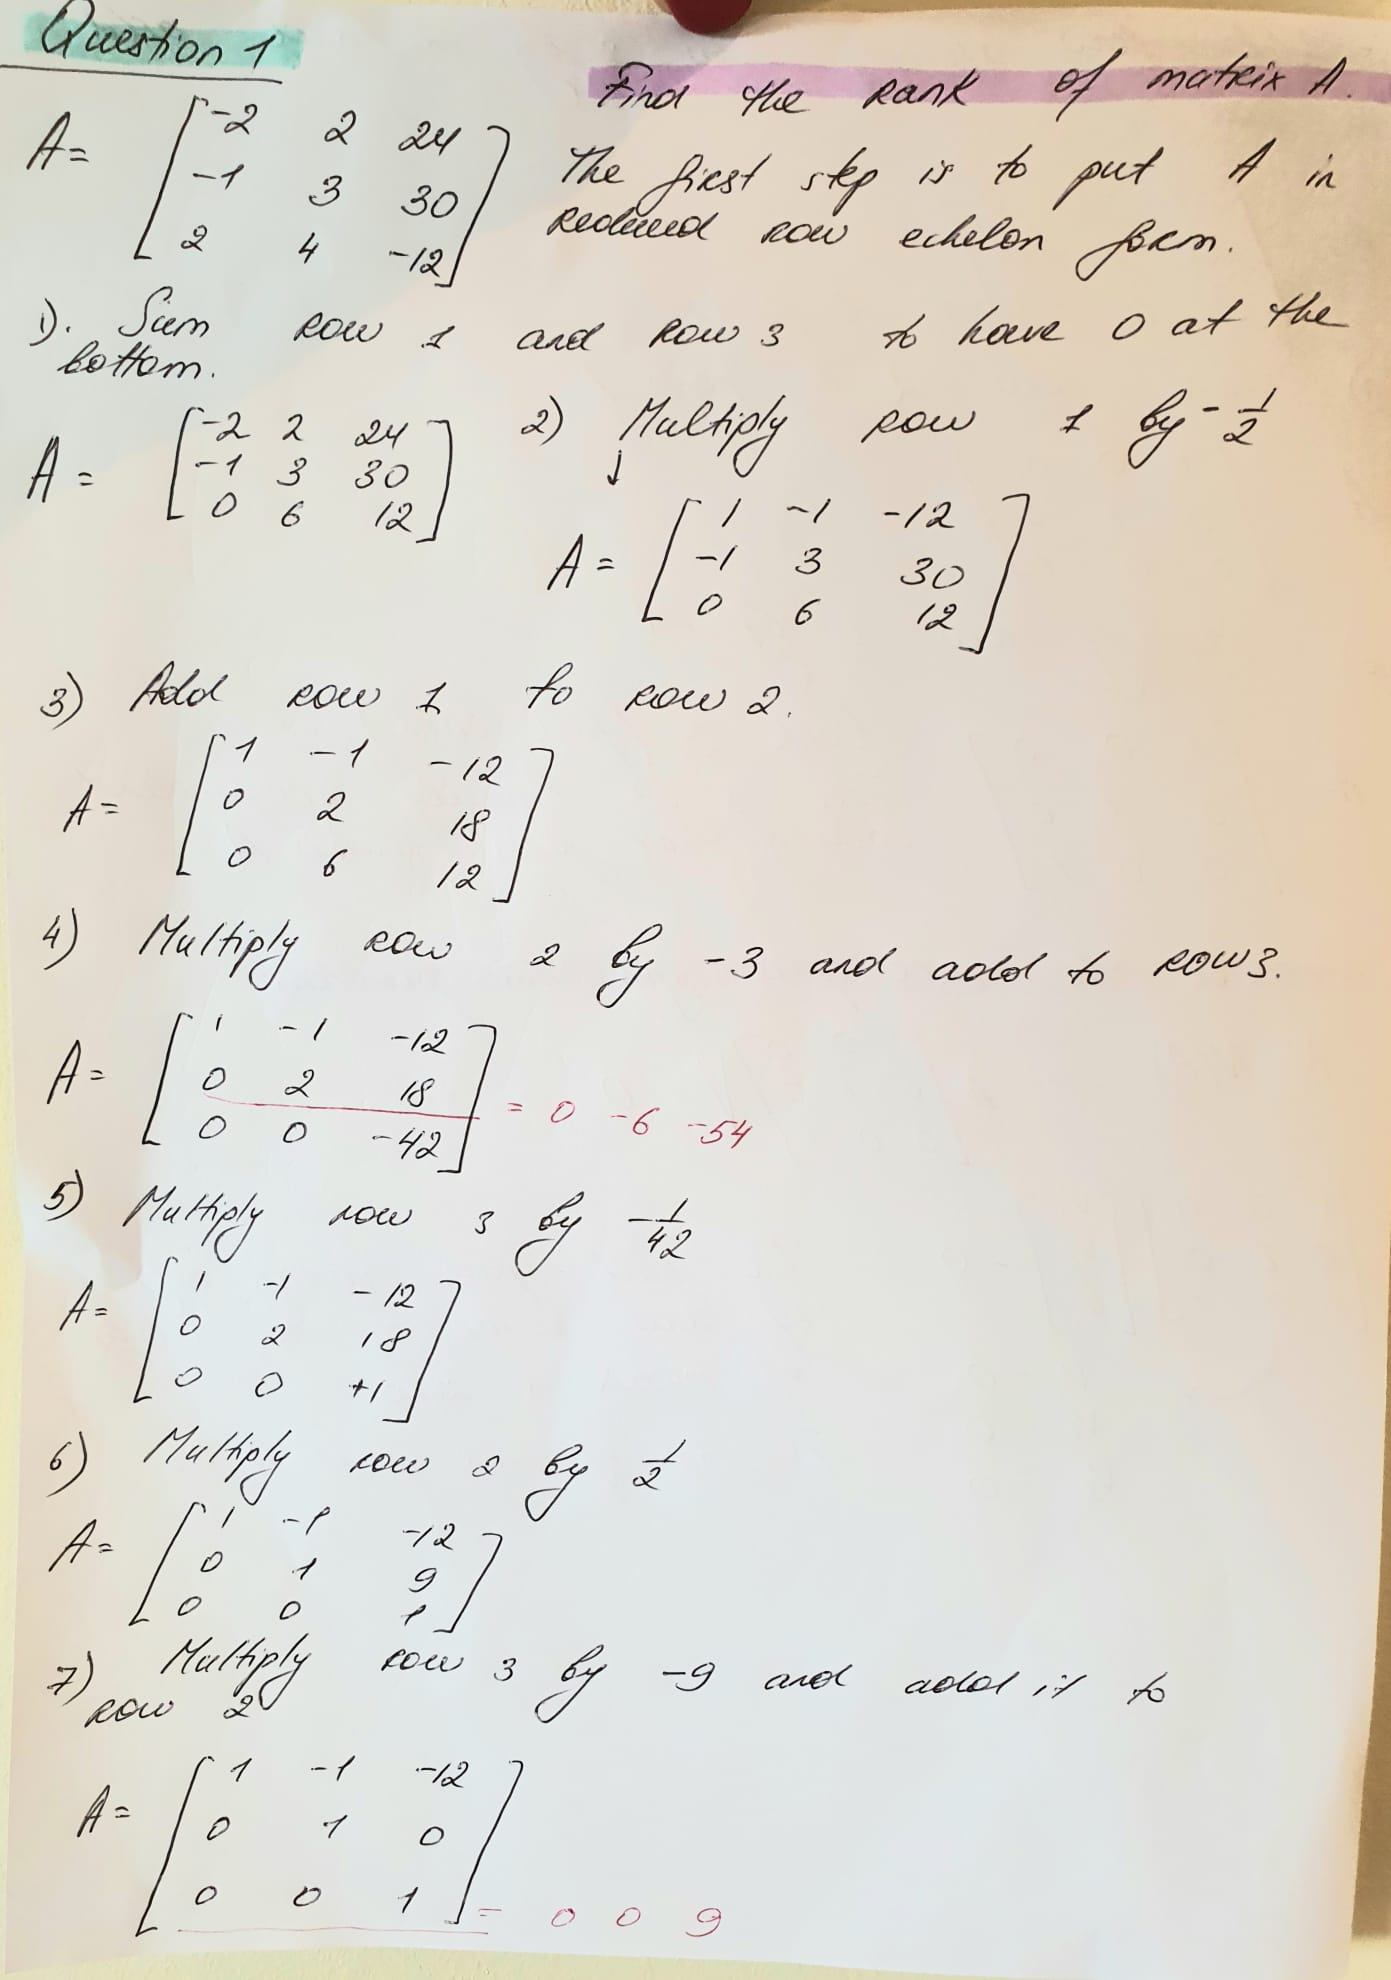

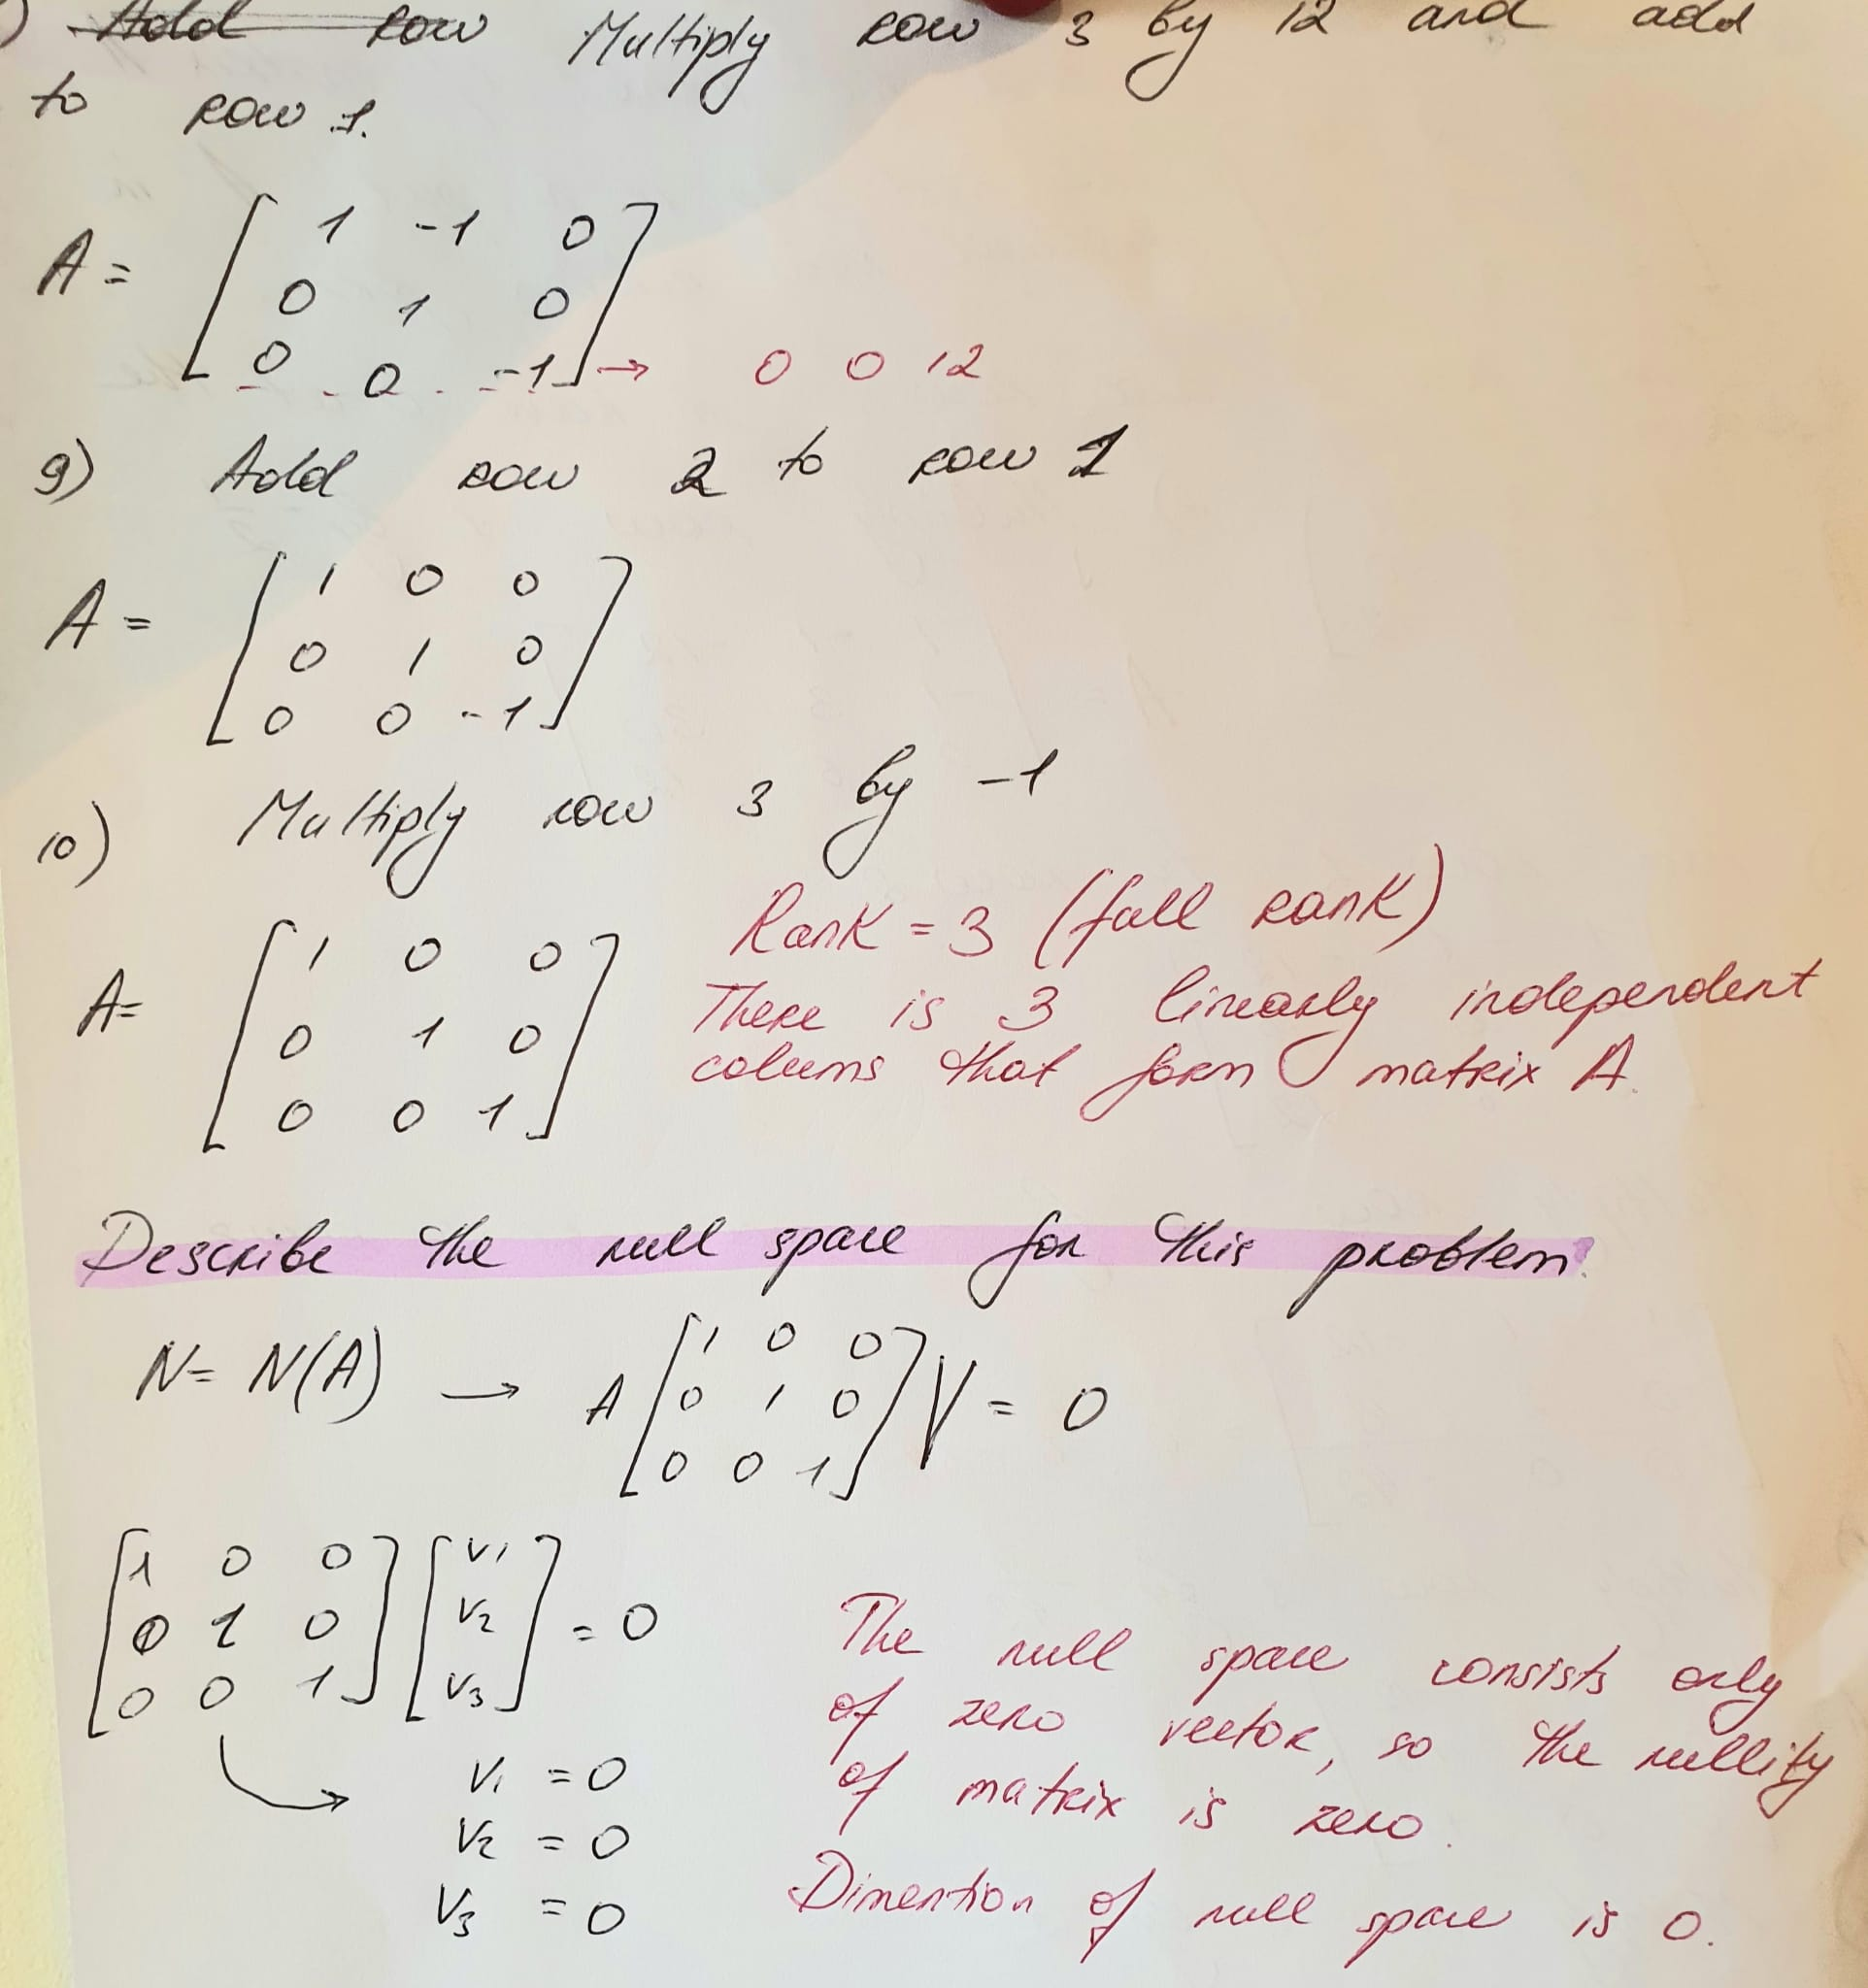

In [57]:
A = np.array([[-2, 2, 24], [-1, 3, 30], [2, 4, -12]])

# Rank of A
rank = matrix_rank(A)
print("Rank of A: ", rank)

# Null space 
null_space = null_space(A)

#The null space is empty, so the nullity of matrix is 0. 
# We can also use rank-nullity theorem to prove this. 

# Number of Columns
NoC = A.shape[1]
  
# Nullity of the Matrix
nullity = NoC - rank

print("Nullity of A: ", nullity)



Rank of A:  3
Nullity of A:  0


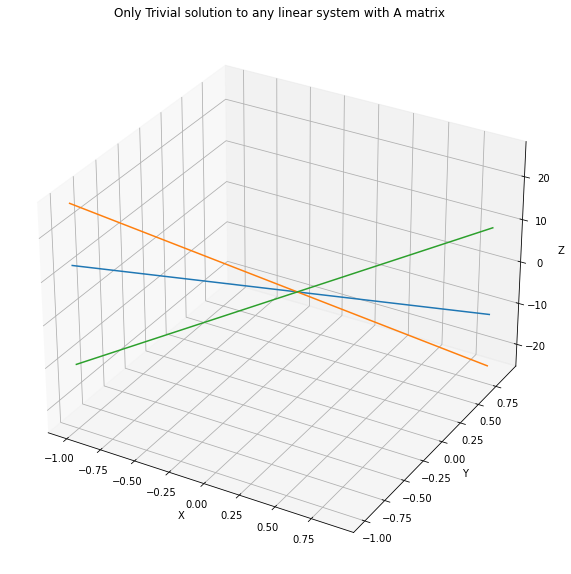

In [58]:
# make 3d axes
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# test data
x = np.arange(-1., 1., .1)
y = np.arange(-1., 1., .1)
z1 = -x -12*y
z2 = 3*x -30*y
z3 = -2*x +12*y

# plot test data
ax.plot(x, y, z1)
ax.plot(x, y, z2)
ax.plot(x, y, z3)

# make labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Only Trivial solution to any linear system with A matrix')

#Columns in matrix A are linerly-independent and each columns has a pivot
#So,  the coefficient part of the matrix has a leading entry that means our system has the trivial solution only.

plt.show()

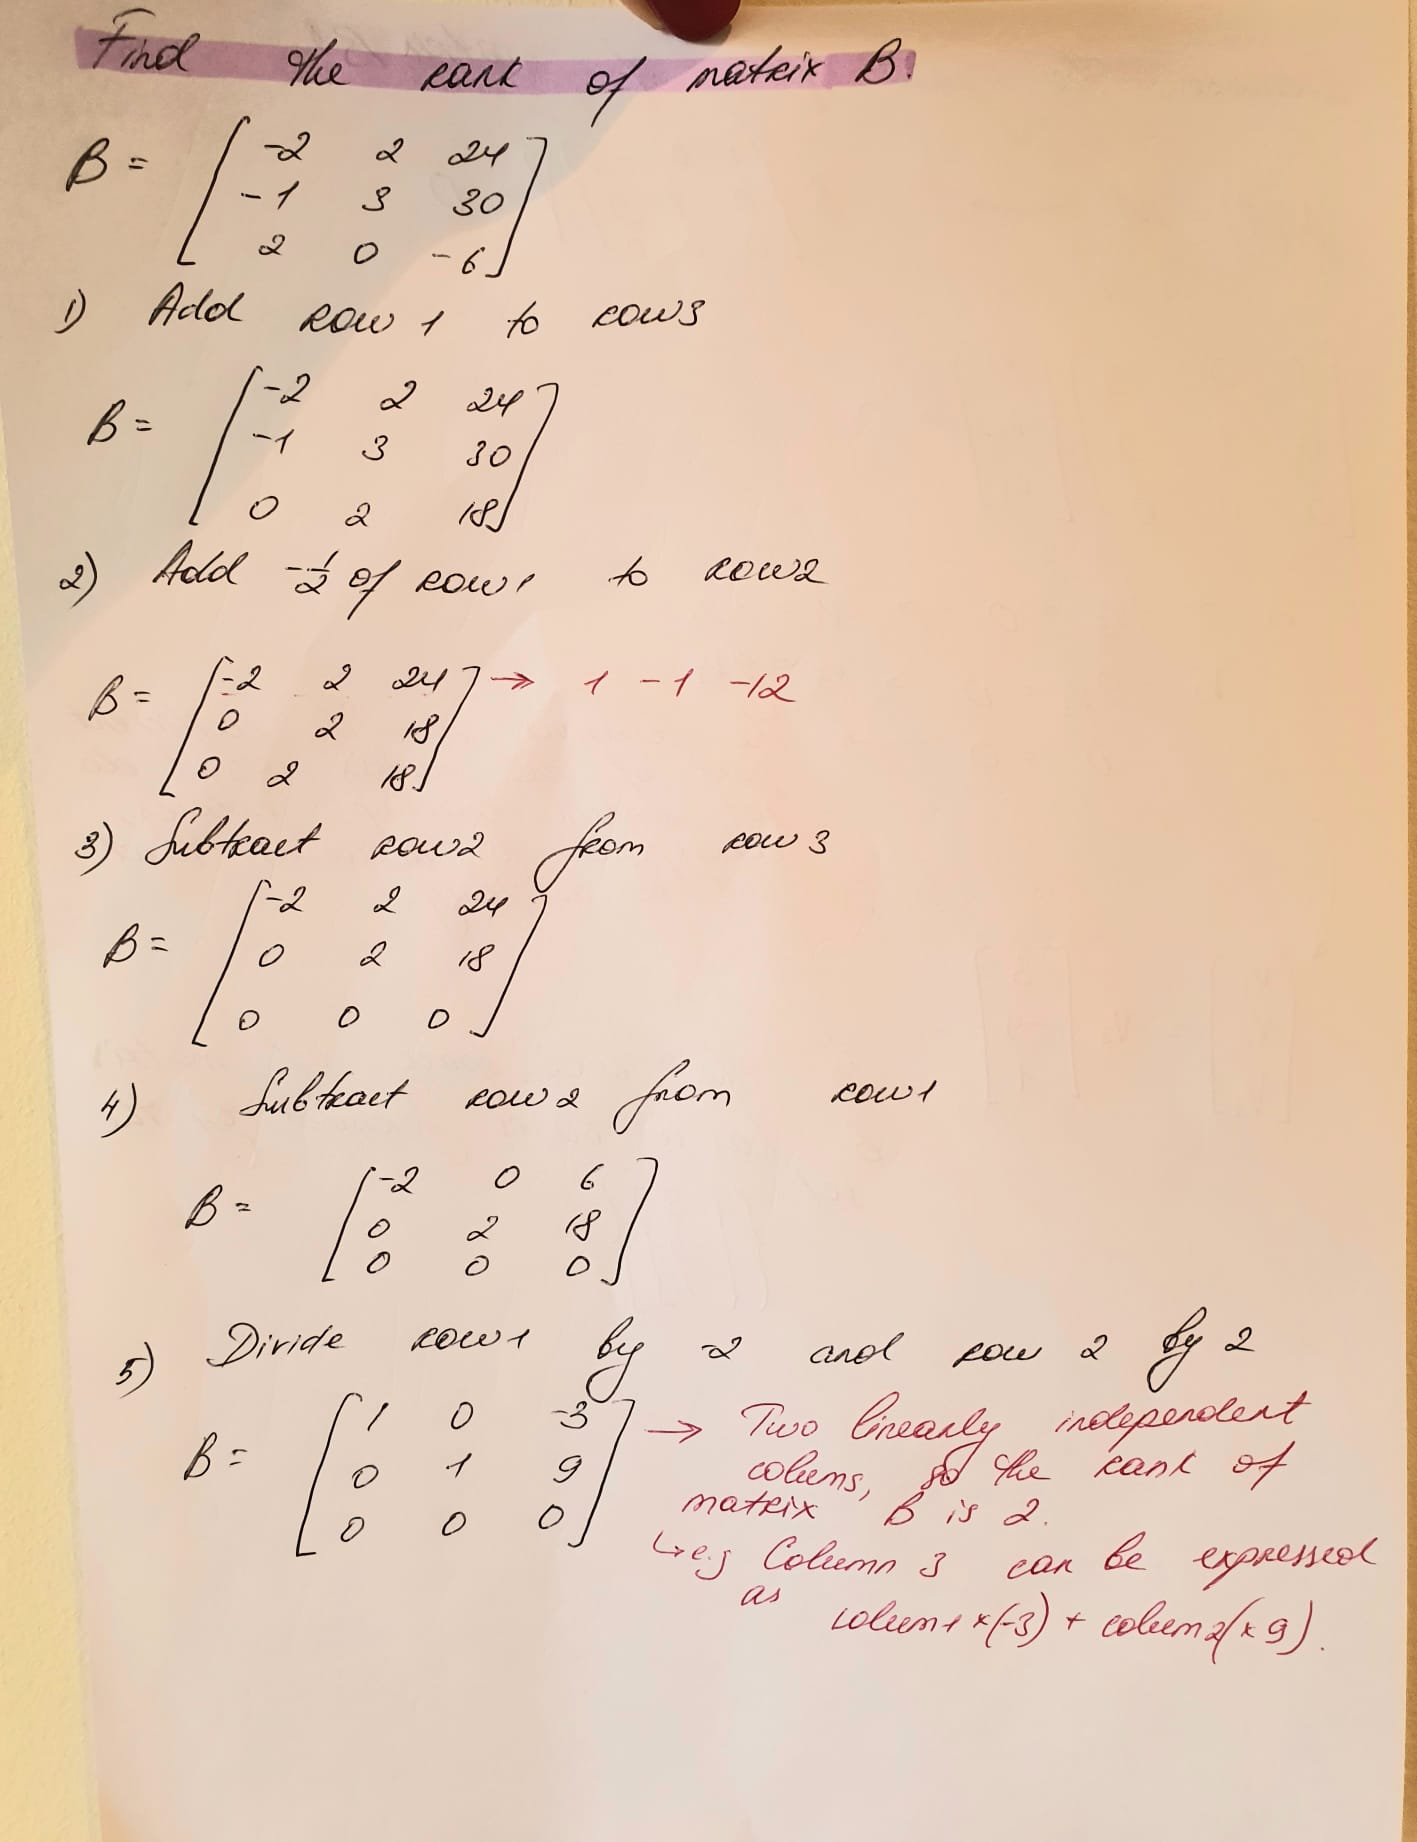

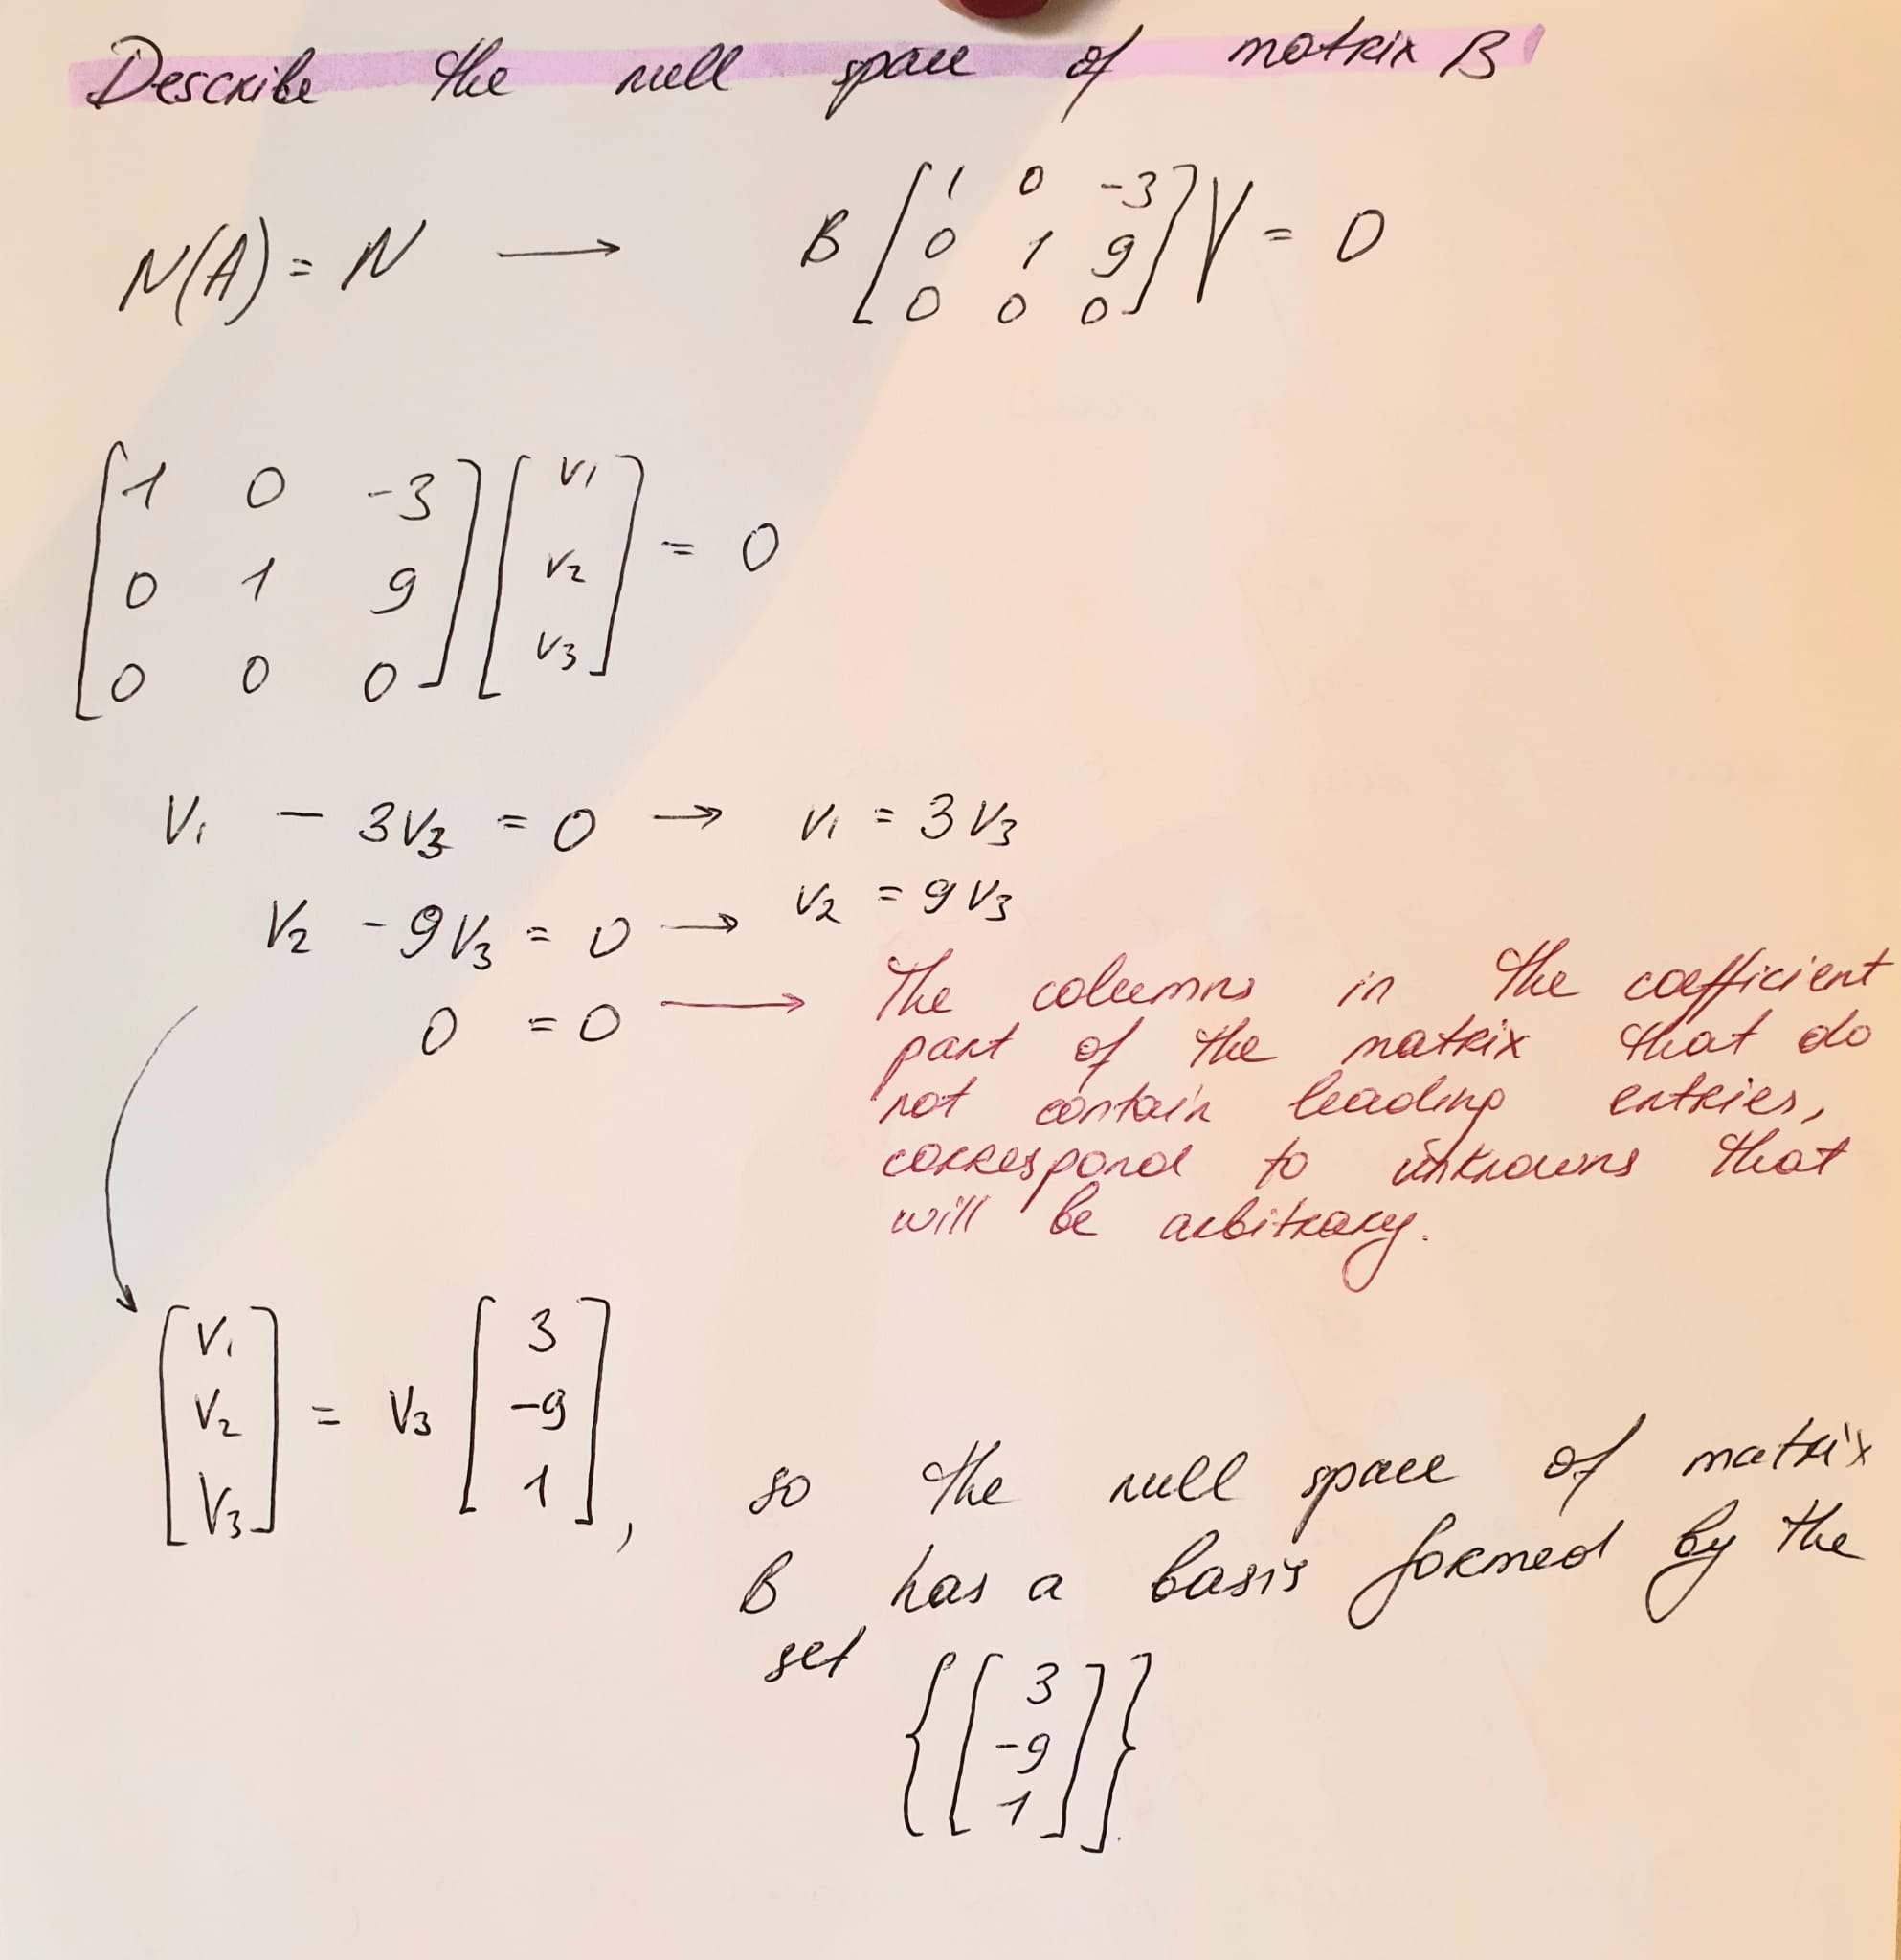

In [64]:
from scipy.linalg import null_space
B = np.array([[-2, 2, 24], [-1, 3, 30], [2, 0, -6]])

# Rank of B
rank = matrix_rank(B)
print("Rank of B: ", rank)

# Null space 

null_space = null_space(B)

#The null space 1. 
# We can also use rank-nullity theorem to prove this. 

# Number of Columns
NoC = B.shape[1]
  
# Nullity of the Matrix
nullity = NoC - rank

print("Nullity of B: ", nullity)

Rank of B:  2
Nullity of B:  1


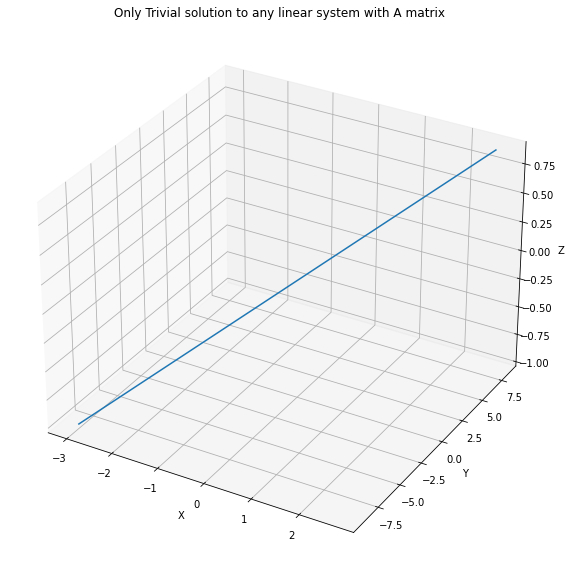

In [66]:
# make 3d axes
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# test data
z = np.arange(-1., 1., .1)
x = 3 *z
y = 9 *z

# plot test data
ax.plot(x, y, z)



# make labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Infinatly many solutions  to any linear system with B matrix')

#Columns in matrix A are linerly-independent and each columns has a pivot
#So,  the coefficient part of the matrix has a leading entry that means our system has the trivial solution only.

plt.show()

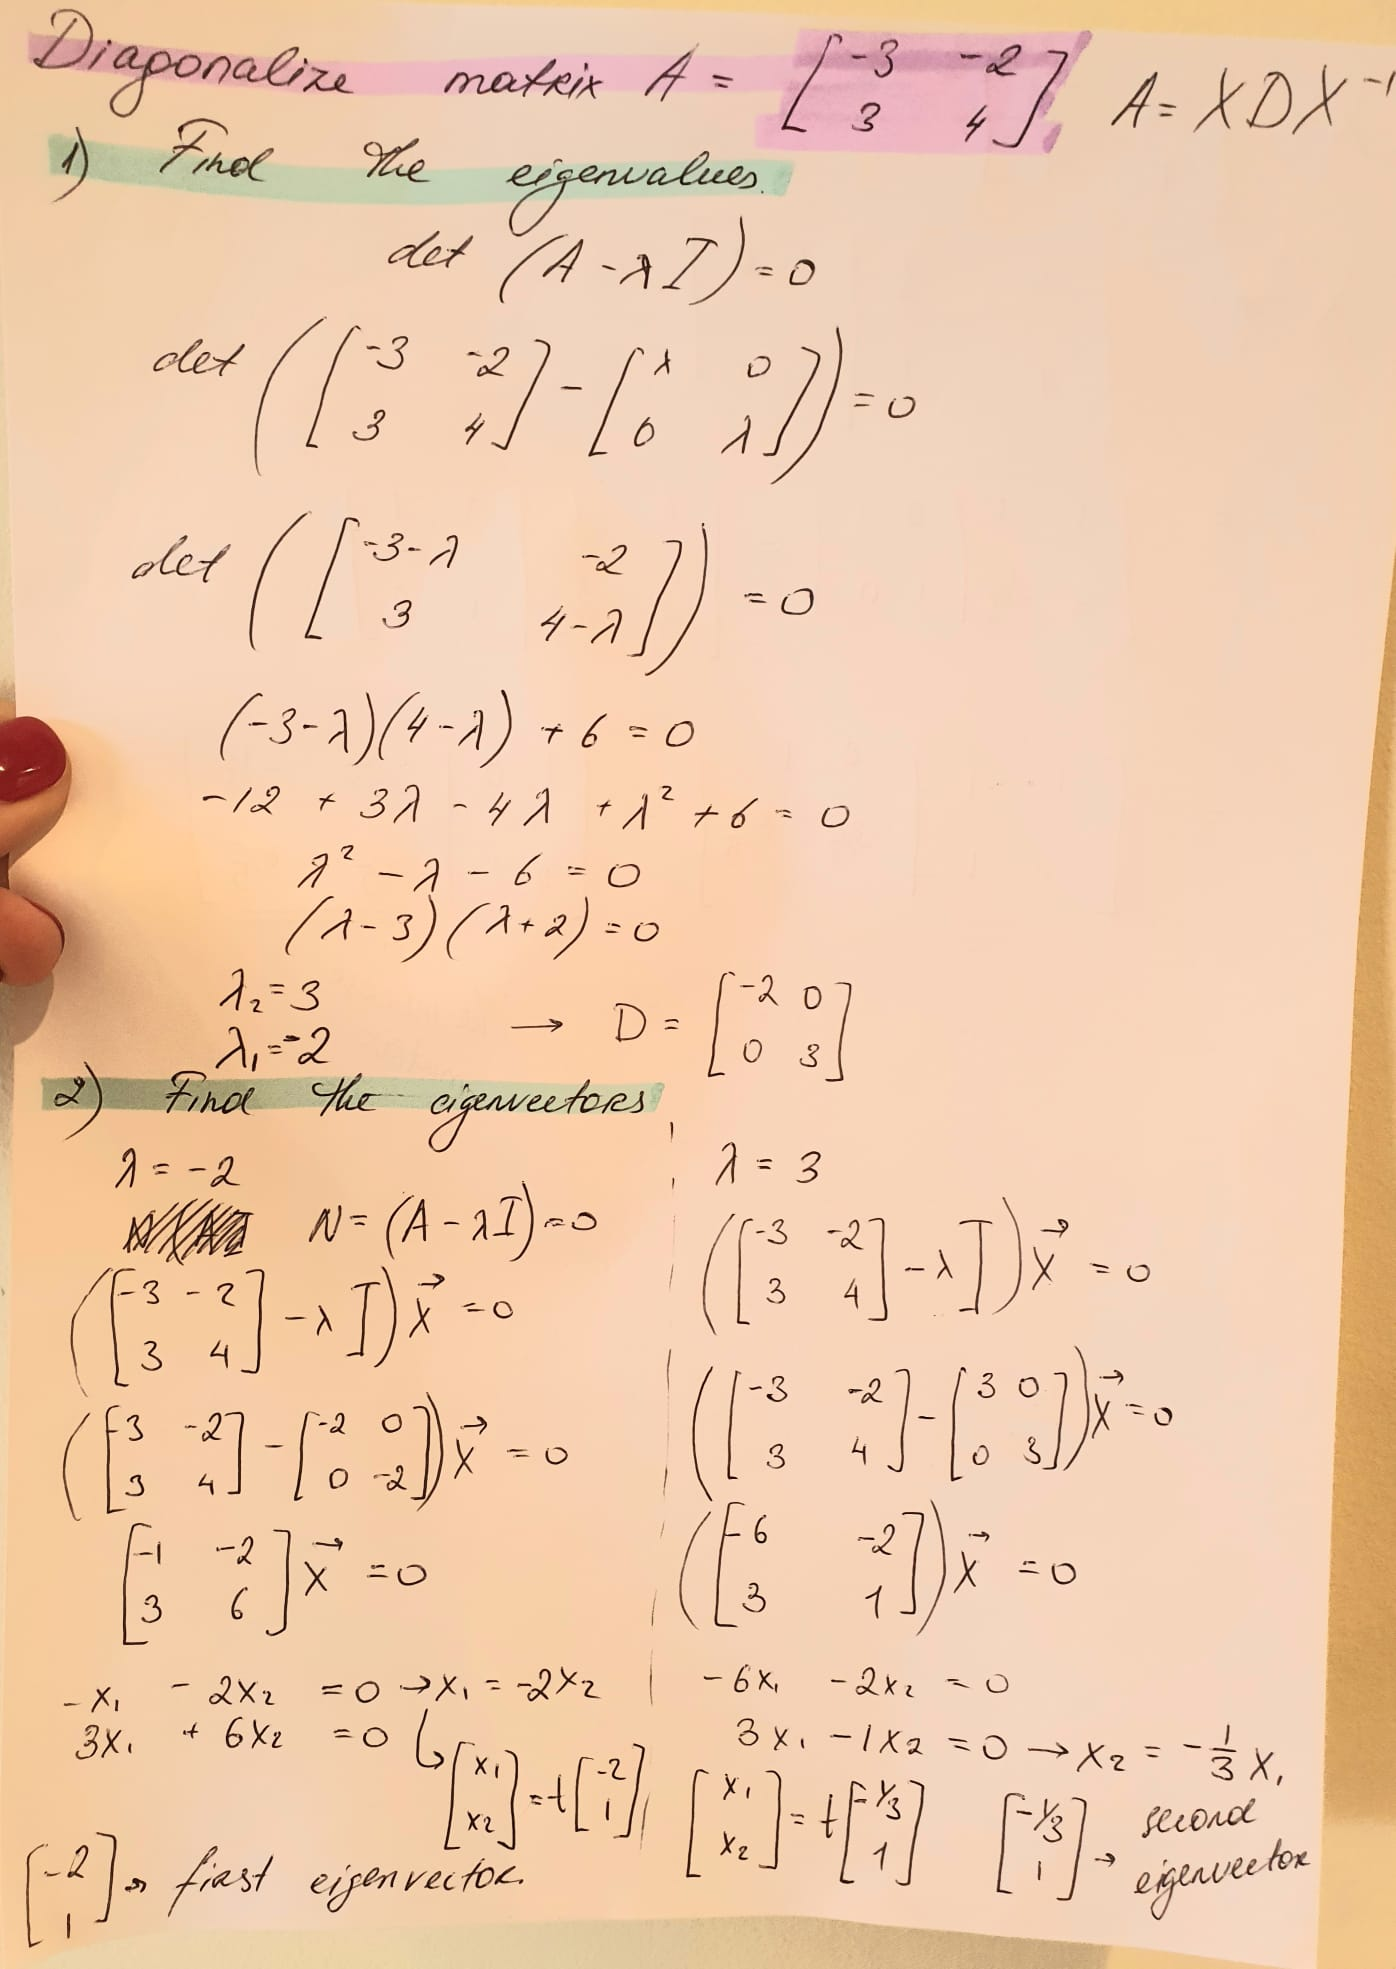

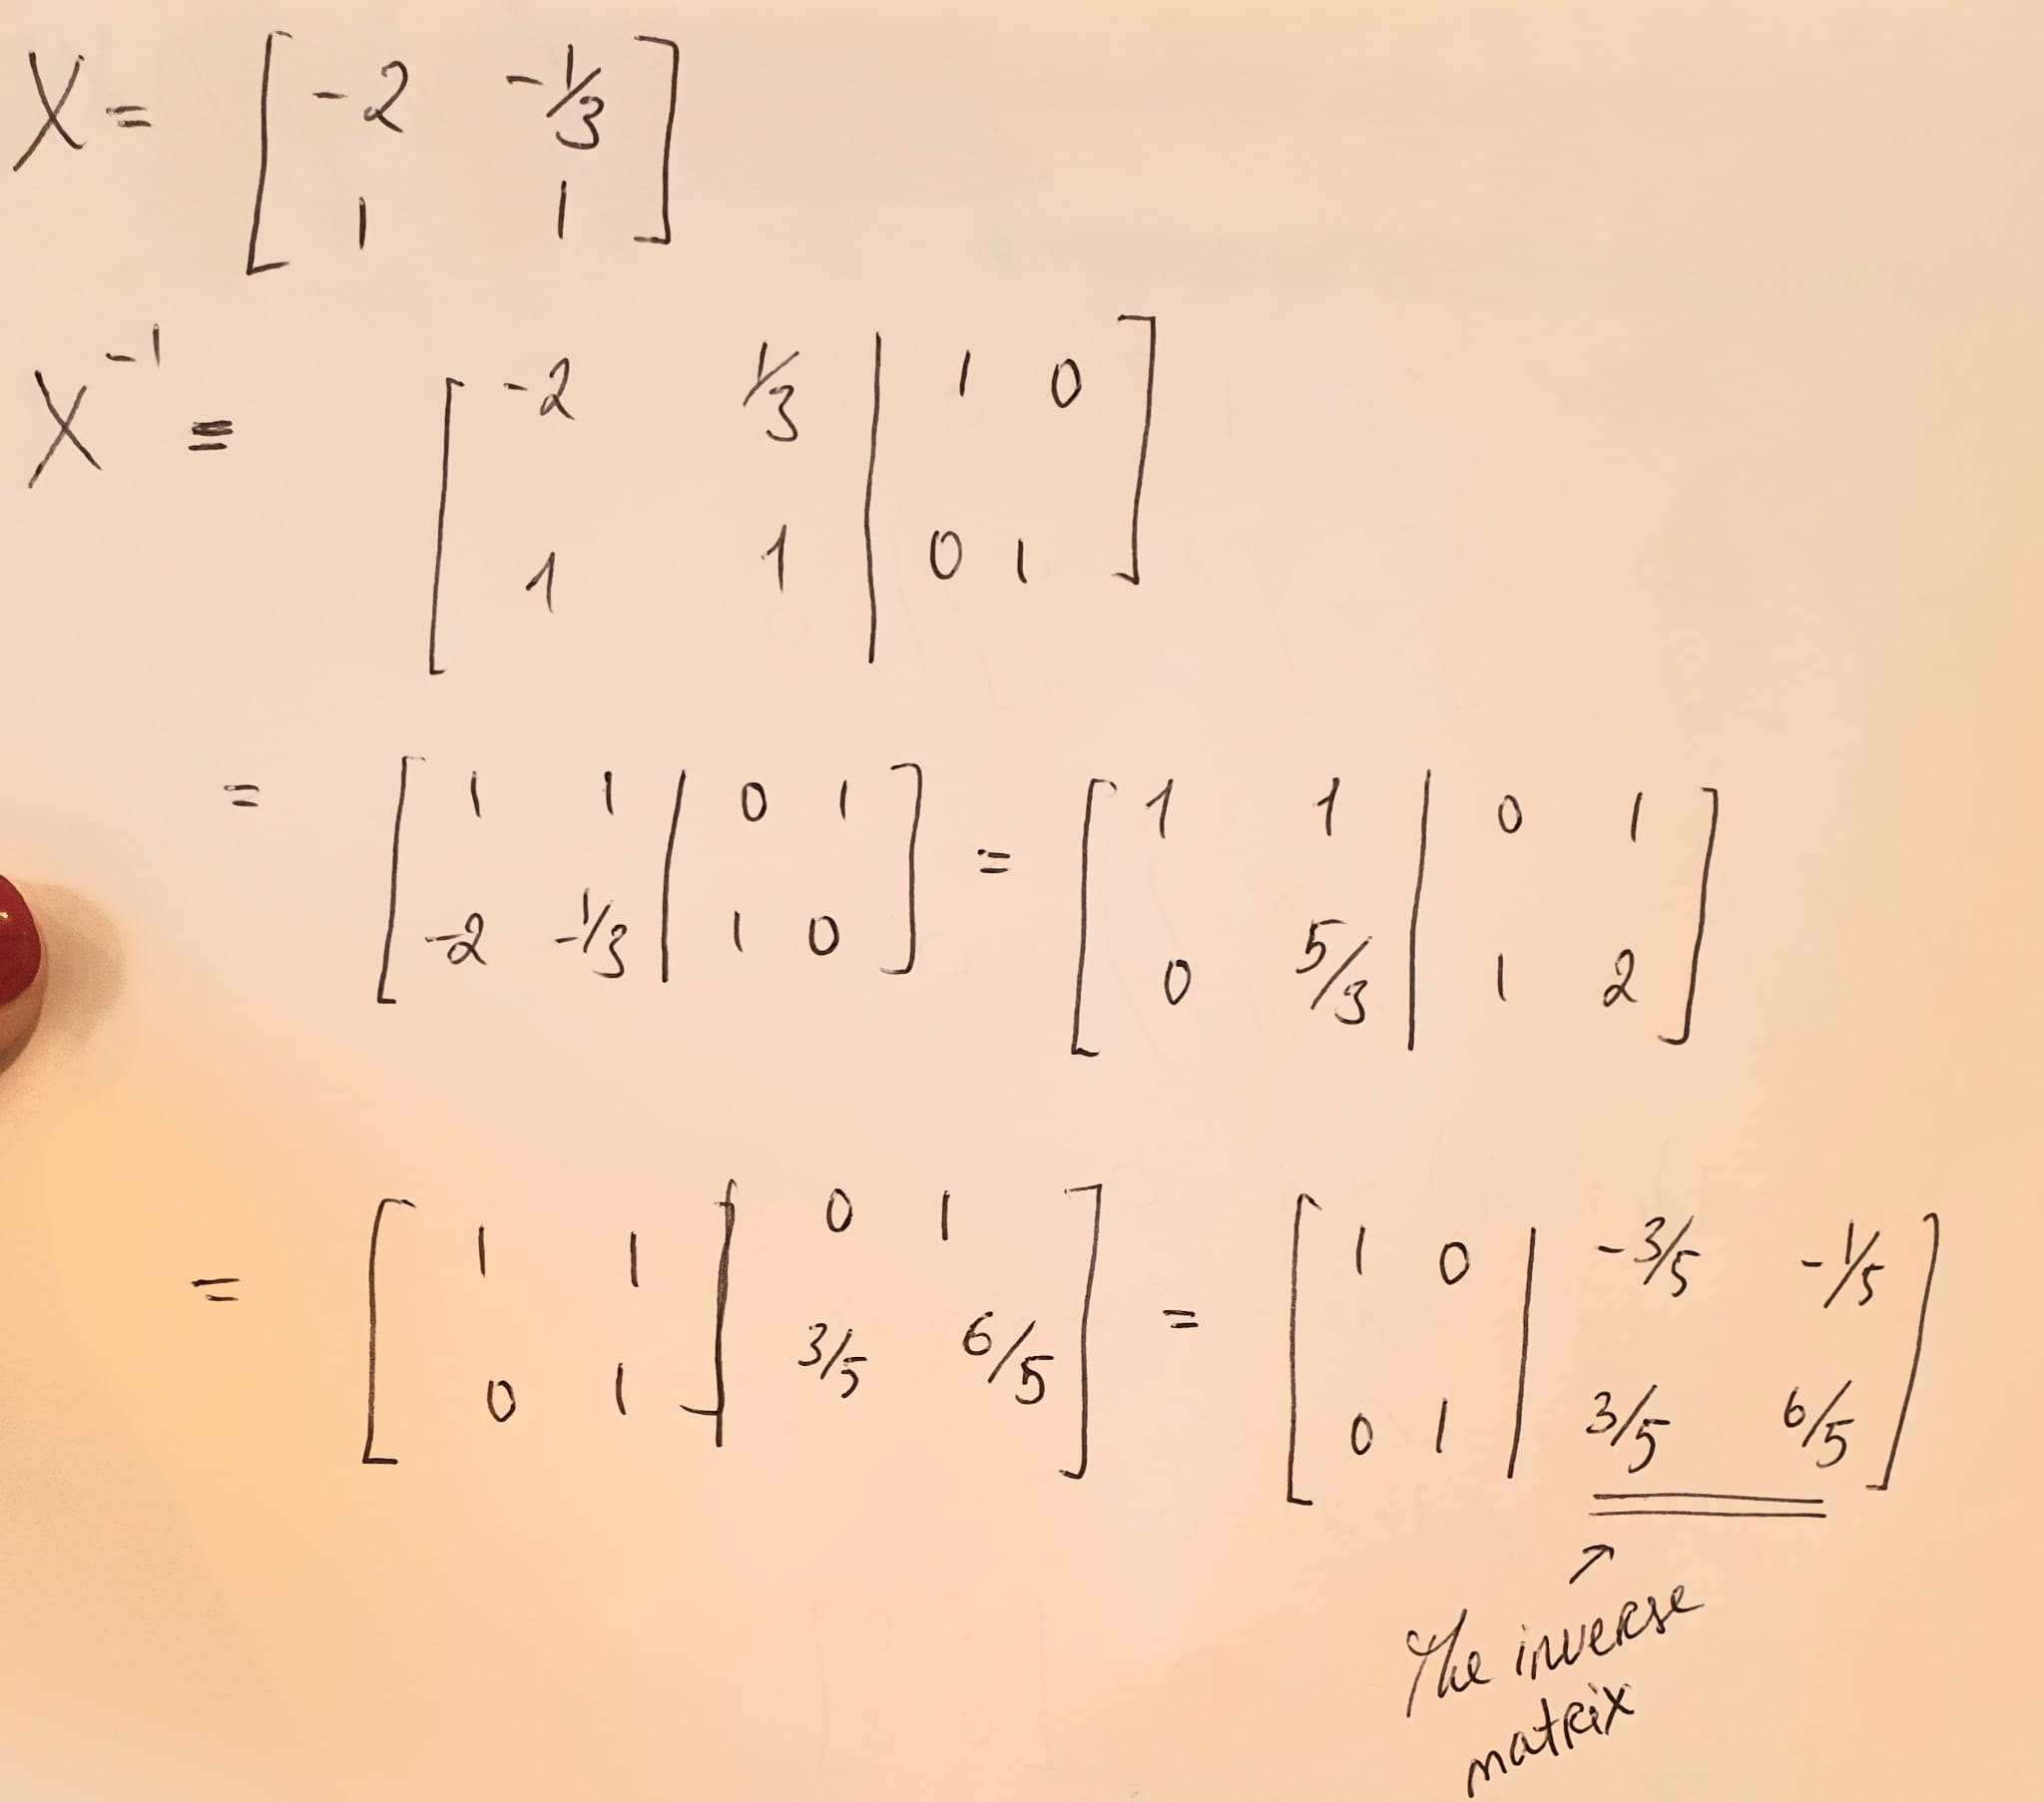

In [83]:
A = np.array([[-3., -2.], [3.,4.]])
lam1 = -2
# use the non-dimensionalised, i.e. unit length e-vecs
v1 = np.array([-2., 1.])
lam2 = 3
v2 = np.array([-1/3, 1])

# force v1 and v2 to be column vecs
v1.shape = (2,1)
v2.shape = (2,1)

# and stack them into the matrix P
P = np.hstack((v1,v2))
print(P)
# and form the diagonal matrix with e'vals on the main diagonal
Lambda = np.diag(np.array([lam1,lam2]))

# we can check if our result is (approximately - read the docs) correct with
print('A = P \Lambda P^{-1}:  ', np.allclose(A , P@Lambda@(sl.inv(P))))


[[-2.         -0.33333333]
 [ 1.          1.        ]]
A = P \Lambda P^{-1}:   True


In [85]:
A = np.array([[-3., -2.], [3.,4.]])
lam, vecs = sl.eig(A)
print('A =  vecs@np.diag(np.real(lam))@sl.inv(vecs)) :', np.allclose(A, vecs@np.diag(np.real(lam))@sl.inv(vecs)))

A =  vecs@np.diag(np.real(lam))@sl.inv(vecs)) : True


# Question 2

<br>

Consider the two $(x,y)$ data points $(0,0.5)$ and $(1,1)$

Derive by hand ("pen and paper") the Lagrange basis functions and thus the Lagrange polynomial that passes through these two points. Show (e.g. through a plot) that your result agrees with the result you can obtain using SciPy.

<br><br>

Now add a third point of your choosing at $x=0.3$ and repeat the above.

<br><br>

How can you add arbitrarily many additional points such that the Lagrange polynomial you have computed just now in the case of three data points is still an interpolant of all the data points? Give some examples.

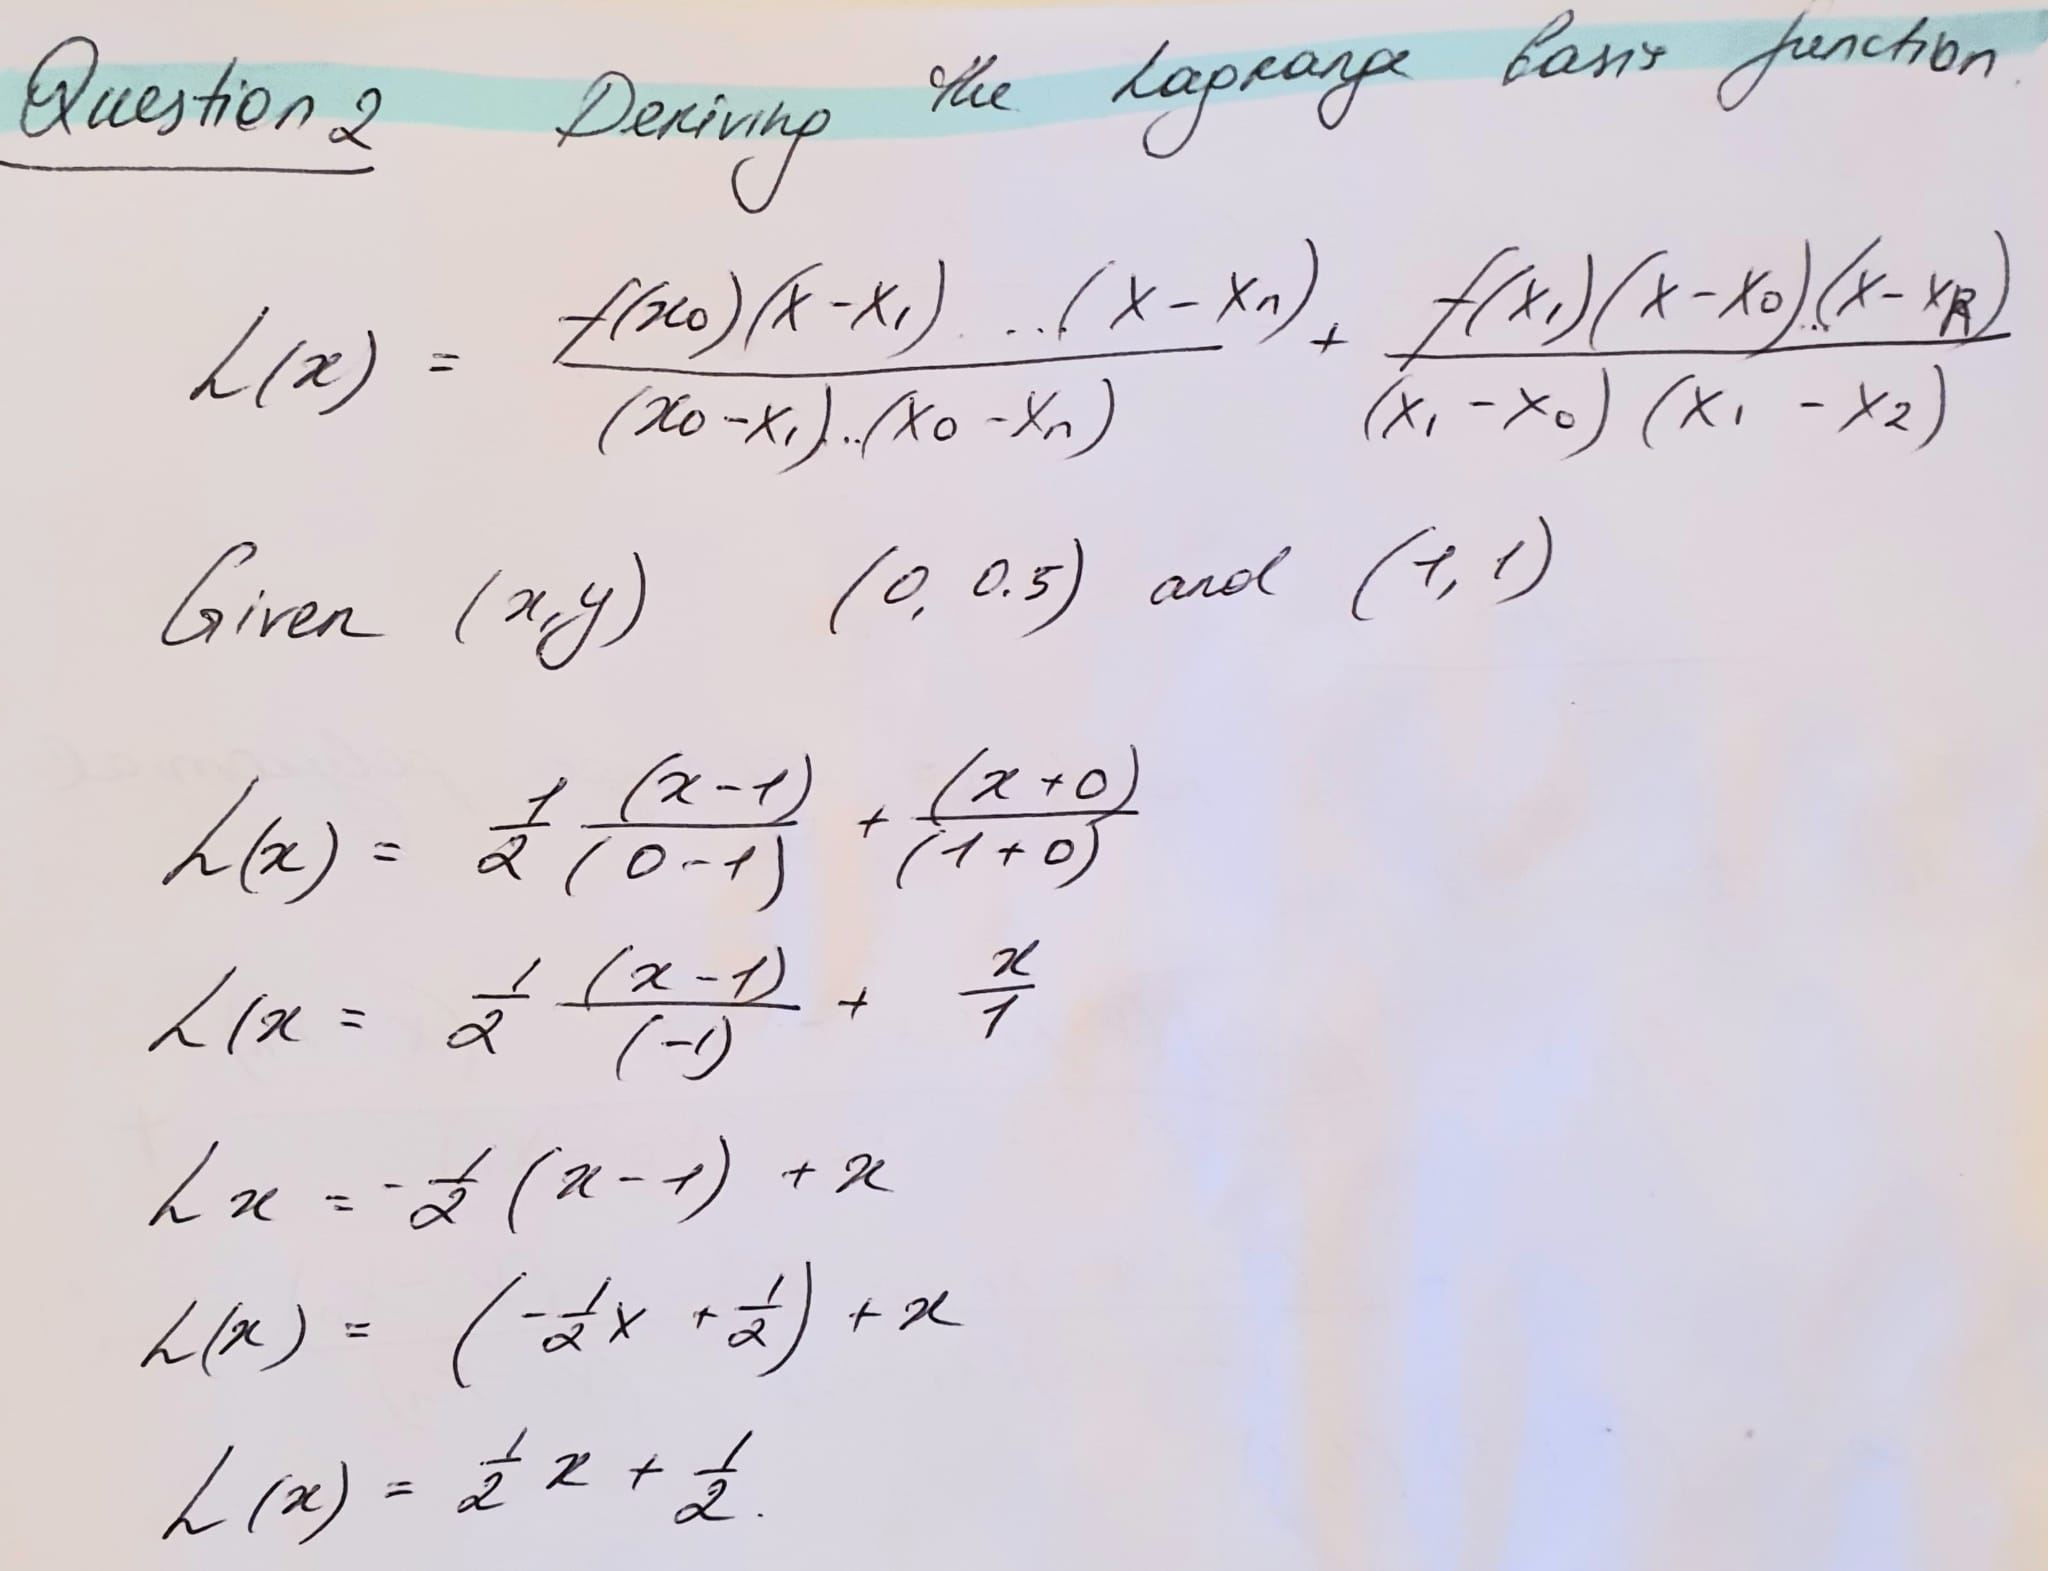

In [94]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import numpy.polynomial.polynomial as poly

x = np.array([0, 1])
y = np.array([0.5, 1])
polynomial = lagrange(x, y)
coeff = Polynomial(polynomial).coef

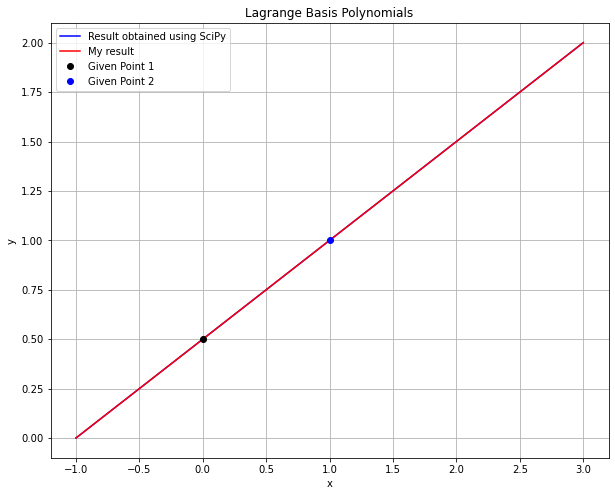

In [107]:
# get the polynomial function
P1 = poly.Polynomial(coeff)

x_new = np.arange(-1.0, 3.1, 0.1)
y = 0.5*x_new +0.5
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'Result obtained using SciPy')
plt.plot(x_new, y, 'r', label = 'My result')

# add a points
p1 = [0, 0.5]
p2 = [1, 1]

# plot it
plt.plot(p1[0],p1[1],'ko', label = 'Given Point 1')
plt.plot(p2[0], p2[1], 'bo', label = 'Given Point 2')

plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

#Lines are overlapping, so result agrees with the result obtained using SciPy.

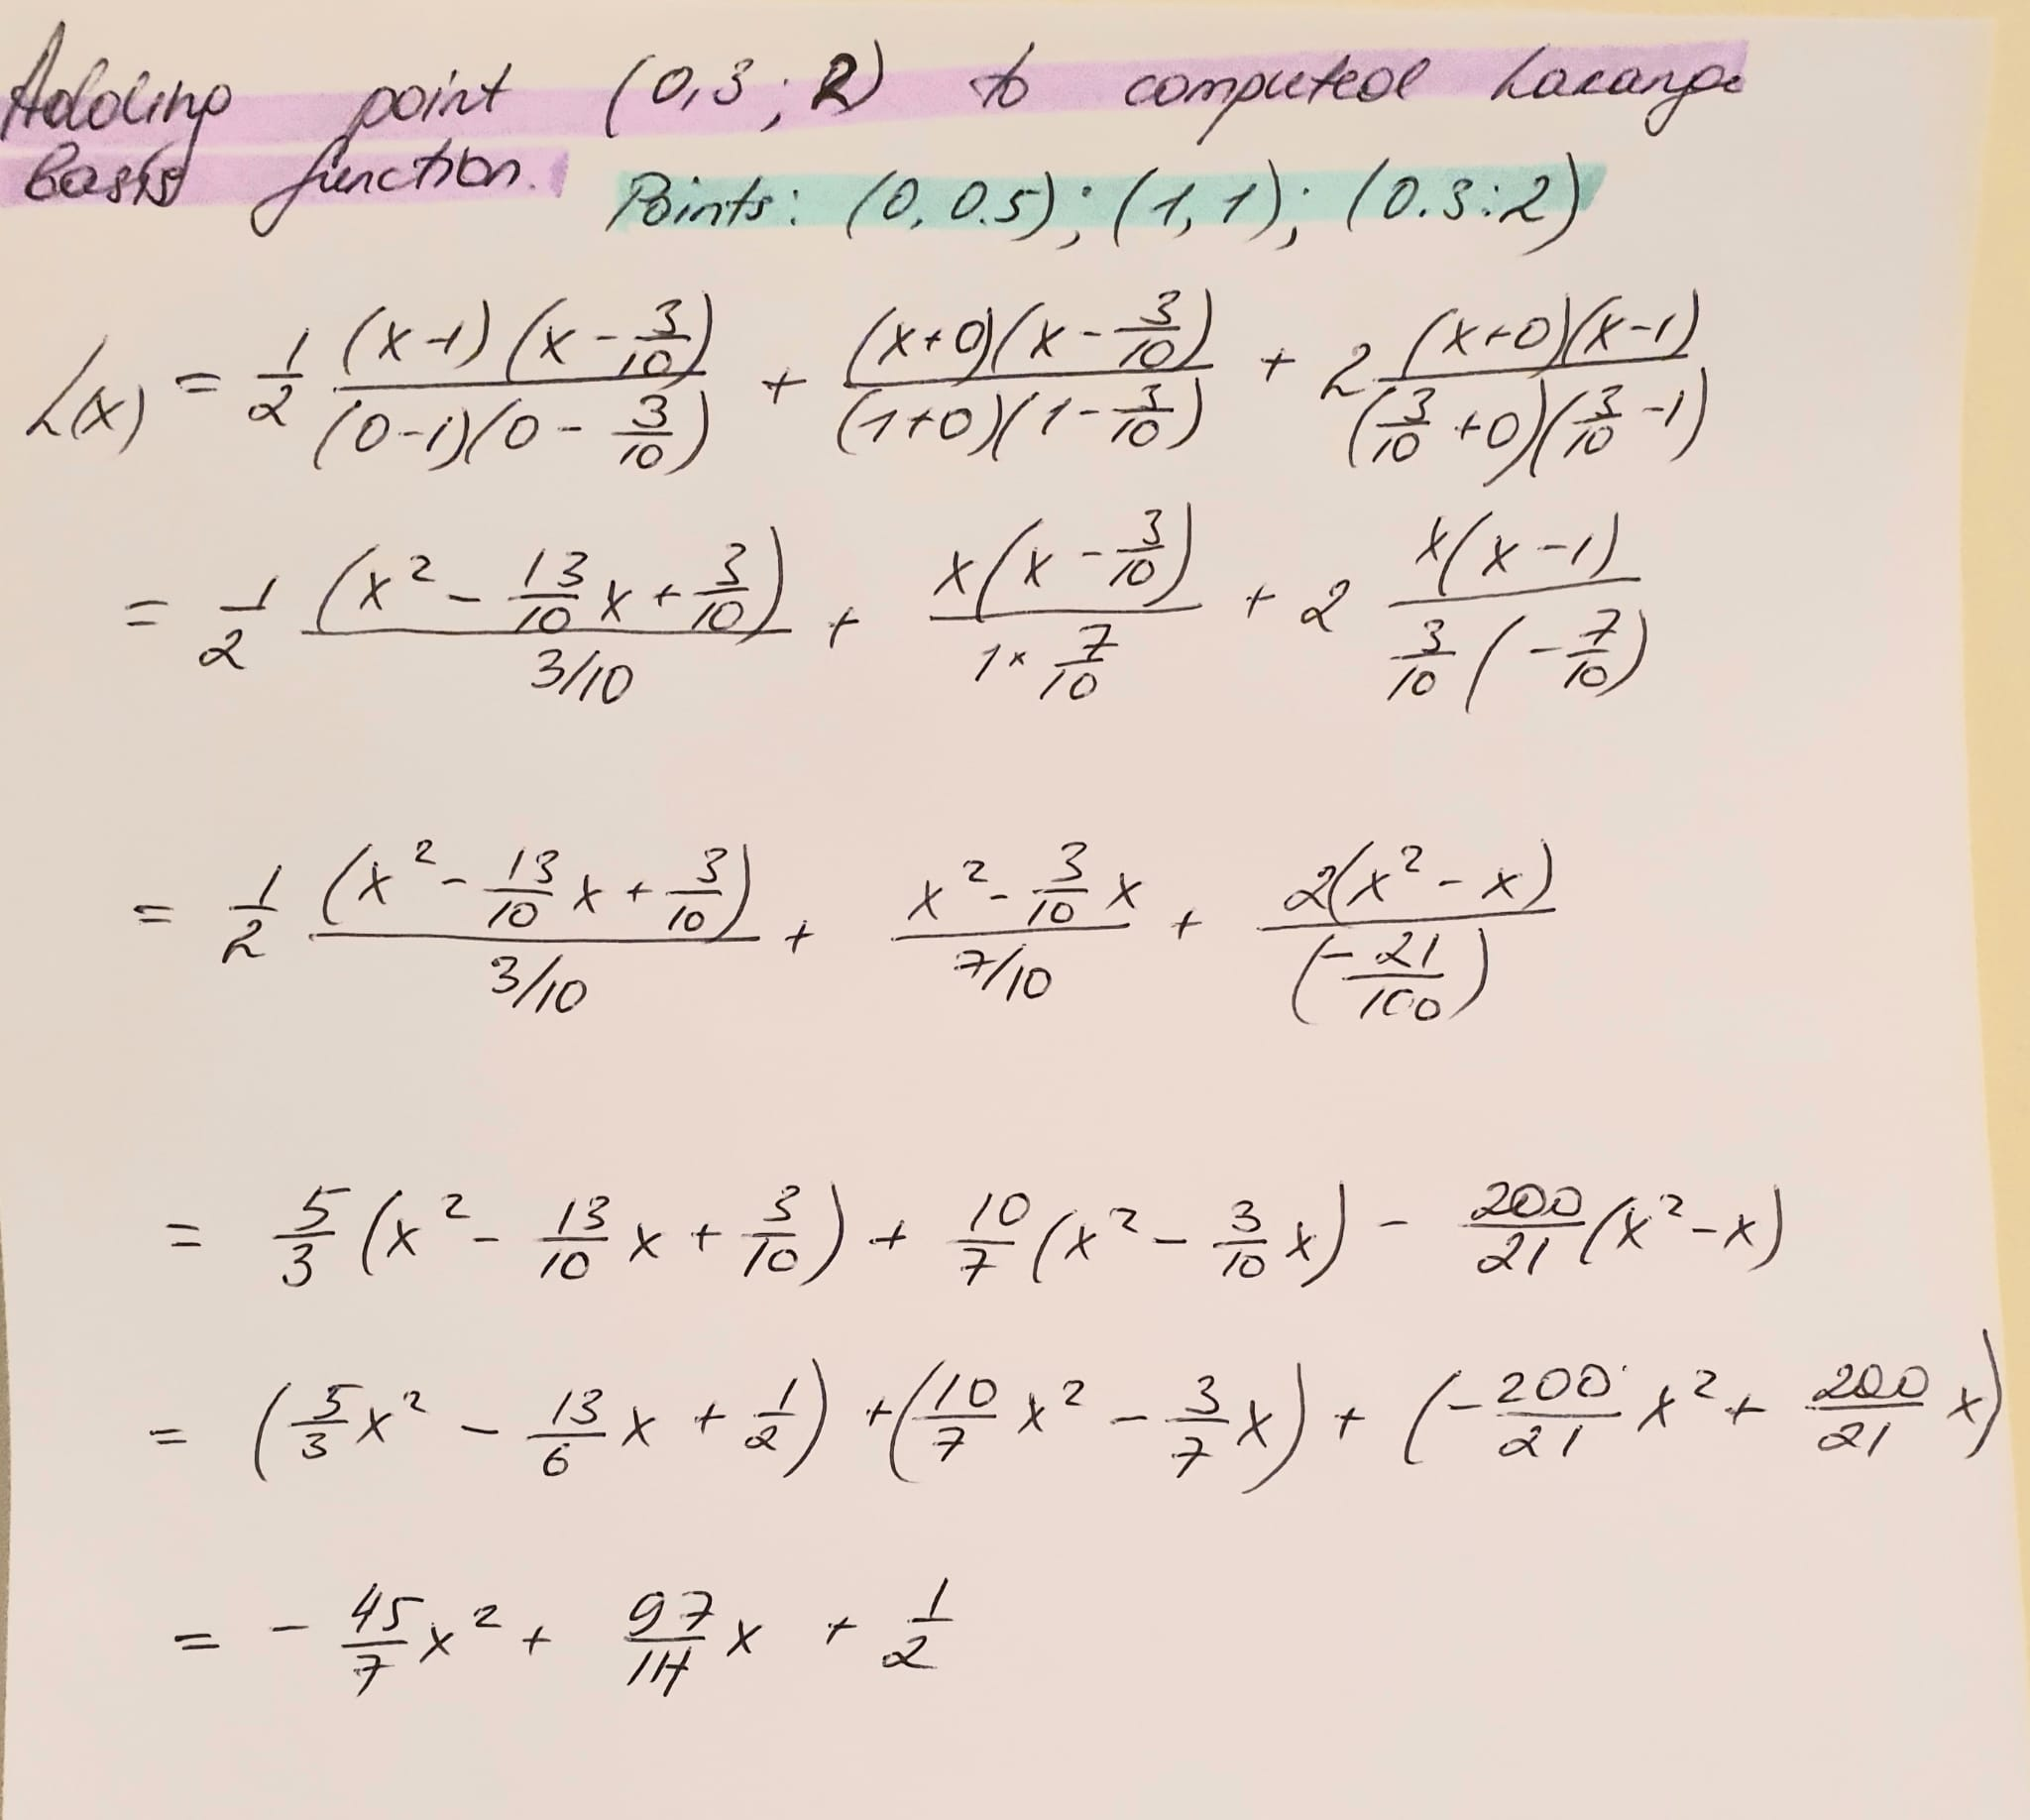

In [137]:
#new point is (0.3, 2)
x = np.array([0, 1, 0.3])
y = np.array([0.5, 1, 2])
polynomial = lagrange(x, y)
coeff = Polynomial(polynomial).coef

(41,)
(41,)


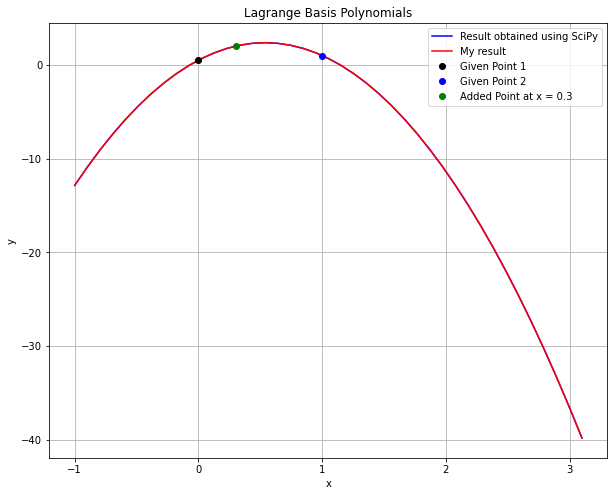

In [302]:
# get the polynomial function
P1 = poly.Polynomial(coeff)
a, b, c= poly.Polynomial(coeff)

x_new = np.linspace(-1.0, 3.1,41)

P1_ = np.array(a*x_new**2 + b*x_new +c)
y = np.array(-45/7*x_new**2 + 97/14*x_new +0.5)
print(x_new.shape)
print(P1_.shape)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1_, 'b', label = 'Result obtained using SciPy')
plt.plot(x_new, y, 'r', label = 'My result')

# add a points
p1 = [0, 0.5]
p2 = [1, 1]
p3 = [0.3, 2]

# plot it
plt.plot(p1[0],p1[1],'ko', label = 'Given Point 1')
plt.plot(p2[0], p2[1], 'bo', label = 'Given Point 2')
plt.plot(p3[0], p3[1], 'go', label = 'Added Point at x = 0.3')

plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

#Lines are overlapping, so result agrees with the result obtained using SciPy.

# Question 3


Recall that the trapezoidal quadrature rule can be written as

$$I_T := \sum_{i=0}^{n-1}\, \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

This provides an approximation to the integral of the function $f(x)$ over the interval spanned
by the equally spaced $x_i$ locations, i.e. 

$$I_T\approx \int_{x_0}^{x_n} f(x)\, dx.$$


<br>

Verify an implementation of this method by checking for convergence using the problem

$$\int_0^1 \exp(x)\, dx = \exp(1) - \exp(0) = \exp(1) - 1$$

<br>

You should find that the Trapezoidal rule is second order accurate, i.e. the error reduces by a factor of 4 if we double the number of intervals (equivalently make the interval size half the size).

This means that we can combine the results from two evaluations of the trapezoidal rule obtained using two different $\Delta x$ values in order to cancel the leading order error term and arrive at a more accurate result.

Using the notation $I_T$ for the output of the trapezoidal rule with $n$ intervals, and $I_{T_2}$ for the output with $2n$ intervals, explain why the result

$$I = \frac{1}{3}\left( 4I_{T_2} - I_T \right)$$

can be expected to yield a more accurate approximation to the integral than either $I_T$ or $I_{T_2}$ alone. 

Using the test case function from earlier in this question, implement this method and demonstrate its improved accuracy.

<br>

Implement the composite version of Simpson's rule, and demonstrate that it provides results equivalent to the the new rule 

$$I = \frac{1}{3}\left( 4I_{T_2} - I_T \right)$$

<br>

Demonstrate mathematically that the form of this new rule (i.e. in the form of the weighted summation of function evaluations it takes) is equivalent to Simpson's rule.

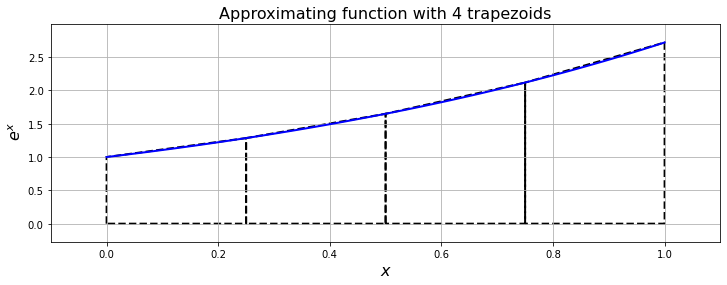

The sum of the areas of 4 trapezoids is (I_T): 1.727221904558
The error of the areas of 4 trapezoids is (I_T_error): 0.008940076098


In [264]:
# this is a matplotlib function that allows us to plot polygons
from matplotlib.patches import Polygon


def f(x):
    """The function we wish to integrate"""
    return np.exp(x)


# Generate equally spaced values from 0 to 1.
x = np.linspace(0, 1.0, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\ e^x$', fontsize=16)
ax1.set_title('Approximating function with 4 trapezoids', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 4
xi = np.linspace(0, 1, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

plt.show()
I_exact = np.exp(1) -1
I_T_error = abs(I_exact - I_T)
print('The sum of the areas of 4 trapezoids is (I_T): {:.12f}'.format(I_T))
print('The error of the areas computed with 4 trapezoids is (I_T_error): {:.12f}'.format(I_T_error))

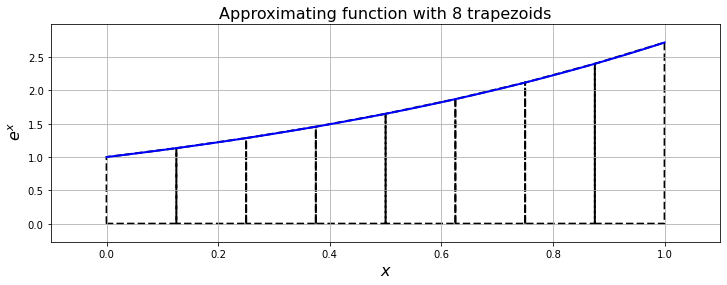

The sum of the areas of 8 trapezoids is (I_T2): 1.720518592164
The error of the areas computed with 8 trapezoids is (I_T2_error): 0.002236763705


In [265]:
# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\ e^x$', fontsize=16)
ax1.set_title('Approximating function with 8 trapezoids', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 8
xi = np.linspace(0, 1, number_intervals+1)
I_T2 = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T2 += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

plt.show()
I_exact = np.exp(1) -1
I_T2_error = abs(I_exact - I_T2)
print('The sum of the areas of 8 trapezoids is (I_T2): {:.12f}'.format(I_T2))
print('The error of the areas computed with 8 trapezoids is (I_T2_error): {:.12f}'.format(I_T2_error))

In [289]:
error_percent_diff = (I_T_error- I_T2_error)/I_T_error *100
print('Error reduces by the factor of 4 when doubling number of intervals(trapezoids)', 'I_T_error:', round(I_T_error, 5),',', '4 times I_T2_error:',round(4*I_T2_error, 5))
I_combined = 1/3*(4*I_T2 - I_T)
I_combined_error = abs(I_exact - I_combined)
epd_I_T = (I_T_error - I_combined_error)/I_T_error *100
epd_I_T2 = (I_T2_error - I_combined_error)/I_T2_error *100
print('The increase of intervals by 2 leads to error reduction by (error_percent_diff): {:.2f}%'.format(error_percent_diff))
print('The area under the curve calculated with two methods combined id (I_combined): {:.12f}'.format(I_combined))
print('The error of combined method is (I_combined_error): {:.12f}'.format(I_combined_error))
print('The error of combined method is (epd_I_T): {:.2f}% lover then method with 4 trapezoids and (epd_I_T2): {:.2f}% lover then method woth 8 trapezoids'.format(epd_I_T, epd_I_T2))

Error reduces by the factor of 4 when doubling number of intervals(trapezoids) I_T_error: 0.00894 , 4 times I_T2_error: 0.00895
The increase of intervals by 2 leads to error reduction by (error_percent_diff): 74.98%
The area under the curve calculated with two methods combined id (I_combined): 1.718284154700
The error of combined method is (I_combined_error): 0.000002326241
The error of combined method is (epd_I_T): 99.97% lover then method with 4 trapezoids and (epd_I_T2): 99.90% lover then method woth 8 trapezoids


In [300]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

I_s = simpsons_rule(0, 1, f, number_intervals=6)
print('Simpson Function  provides results equivalent to the the new rule:', np.allclose(I_combined, I_s))

Simpson Function  provides results equivalent to the the new rule: True


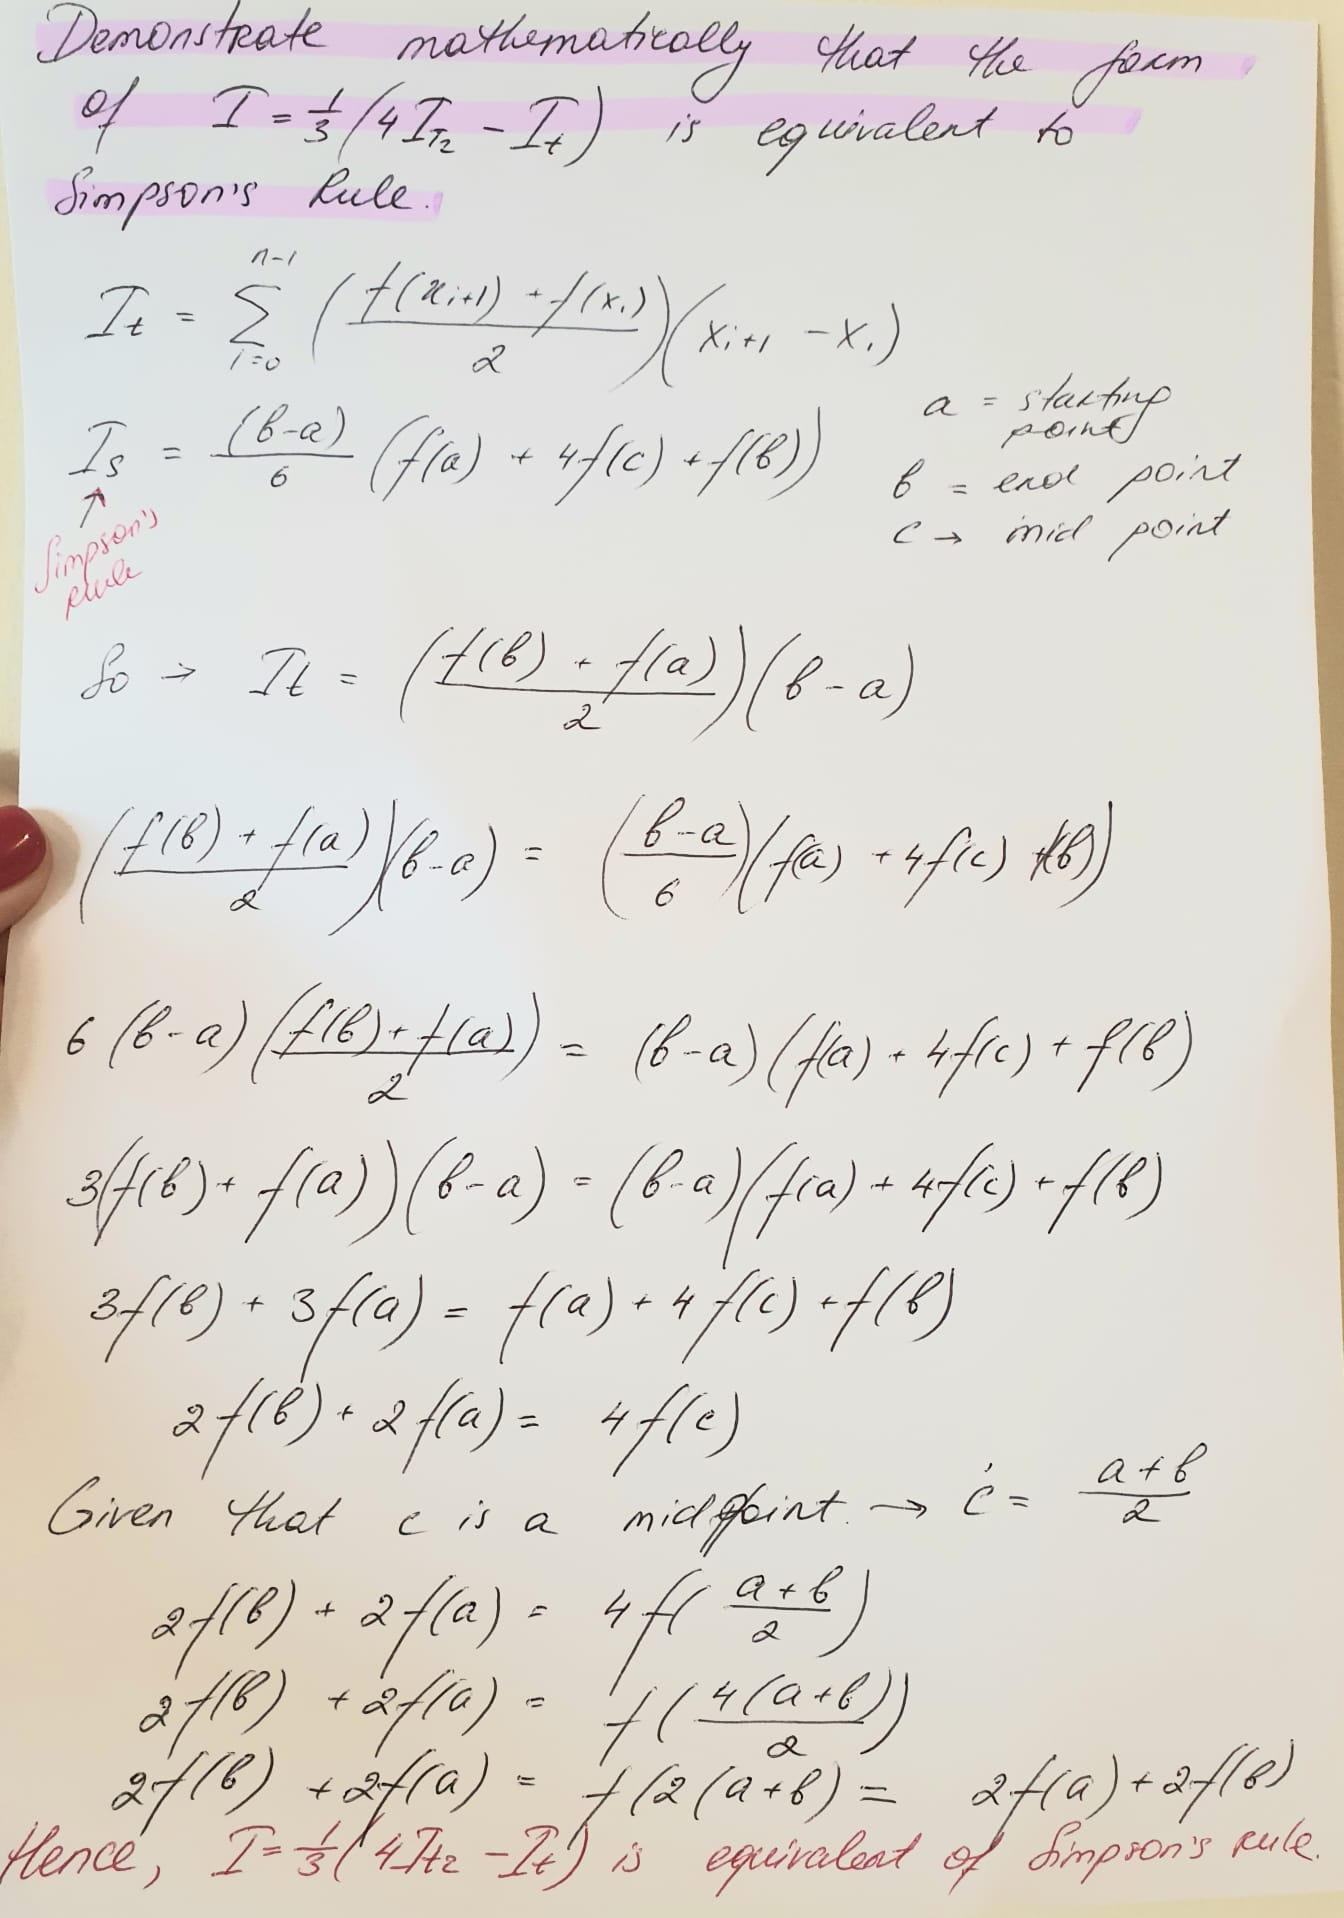

# Question 4 

Recall the Taylor series expansion in the form

$$ y_{n+1} = y_n + \Delta t\, y'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4),$$

where we're using the notation $\,y_n := y(t_n)\,$ and $\,y'_n := f(t_n,y_n)\,$.

We used this expansion, dropping second-order terms, as a means to derive the forward Euler scheme as a solver for ODEs.

One way to derive higher-order schemes is to keep additional terms in this expansion. This should clearly, by definition, result in ODE solvers with higher-order local truncation errors.

However, to obtain a usable scheme we need to write these additional terms in terms of things that we know - note that for a general ODE problem we don't know $\,y'', \, y'''\,$ etc as we don't know the exact solution of course.

But we do know the RHS function $f$ and using the chain rule we can equate the unknown $y$ derivatives with $f$ derivatives that we can calculate from the given form of $f$:

$$ y'' = \frac{dy'}{dt} = \frac{df(t,y(t))}{dt} = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}\frac{d y}{d t} = f_t + f_y \, y' = f_t + f \, f_y,  $$

where we're using the notation for partial derivatives

$$f_t \equiv \frac{\partial f}{\partial t}, \;\;
f_y \equiv \frac{\partial f}{\partial y}$$


Similarly,  use of the chain rule can be shown to yield

$$ y''' = f_{tt} + 2f\,f_{yt} + f_t\,f_y + f\,f_y^2 + f^2\,f_{yy}, $$

where 

$$f_{tt} \equiv \frac{\partial^2 f}{\partial t^2}, \;\;
f_{yt} \equiv \frac{\partial^2 f}{\partial y \partial t}, \;\;
f_{yy} \equiv \frac{\partial^2 f}{\partial y^2}$$


<br> <br>

Now since we know $f$ as a function of $t$ and $y$ we can in principle compute all of these terms and evaluate them at time level $n$ to achieve a higher-order time-stepping method via the Taylor series expansion.


<br> <br>
   
Implement these methods in code and test them using the test case

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

Integrate up to time $t=3$ and use an appropriate error metric to verify your implementation and check for convergence rates.

Comment on whether your convergence results give what would be expected given the local truncation error of your methods.

<br> <br>

Compare your solution against RK4 and comment on why RK4 might be considered to represent a better method than what you've just implemented.

In [246]:
f_y = 1
f_tt = 6
f_yy = 0
f_yt = 0

def f(t, y):
    """ First Derivative
    """
    return y + t**3

def f_t(t):
    """ Second Derivative
    """
    return 3*t**2

def exact(t):
    """ Function to evaluate the exact solution to the problem.
    """ 
    return 7*np.exp(t)- t**3 - 3*t**2 -6*t -6


def forward_euler(f, y0, t0, t_max, dt):
    """ Forward Euler with tw0 extra terms of second and third derivative.
    """ 
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y_tt = f_t(t) +f(t, y)*f_y
        y_ttt = f_tt+2*f(t, y)*f_yt+f_t(t)*f_y+f(t, y)*f_y**2+f(t, y)**2*f_yy
        y = y + dt*f(t, y) + dt**2/math.factorial(2)* f_tt +dt**3/math.factorial(3)* f_tt # euler guess


        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def RK4(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


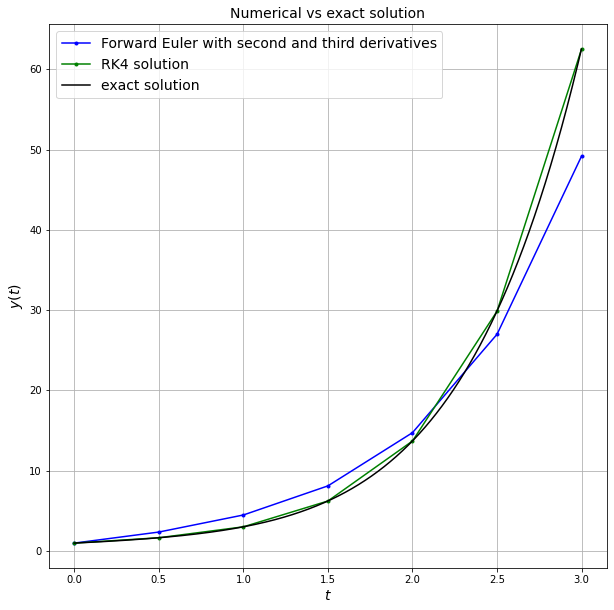

In [252]:
#Estimations
ys, ts = forward_euler(f, 1, 0, 3, 0.5)
rk4y, rk4t = RK4(f, 1, 0, 3, 0.5)

#Exact Solutions
es = np.array(exact(ts))

#initial conditions
y0 = 1
t0 = 0
t_max = 3
dt = 1/10
tend = 3

# now plot the solution
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)
ax1.plot(ts, ys, 'b.-', label='Forward Euler with second and third derivatives')
ax1.plot(rk4t, rk4y, 'g.-', label='RK4 solution')
# let's use a finer resolution to plot the exact solution to give a smoother line.
t_fine = np.arange(0, tend, dt/100)
ax1.plot(t_fine, exact(t_fine), 'k', label='exact solution')
ax1.set_xlabel(r'$t$', fontsize = 14)
ax1.set_ylabel(r'$y(t)$', fontsize = 14)
ax1.set_title('Numerical vs exact solution', fontsize = 14)
ax1.grid(True)
ax1.legend(loc='best', fontsize = 14);

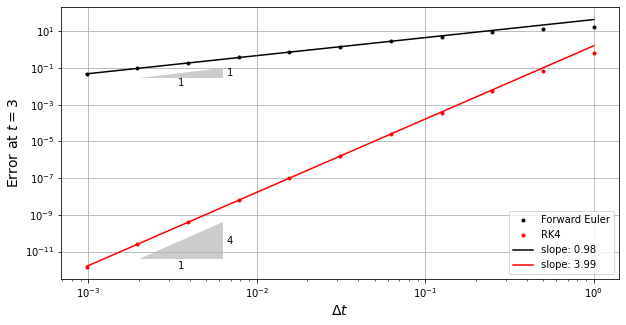

In [251]:
#initial conditions
y0 = 1
t0 = 0
t_max = 3
dt = 7/10


def approx_error(dt, t_max):
    uall, tall = forward_euler(f, y0, t0, t_max, dt)
    err_fe = abs(uall[-1]-exact(t_max))
    uall, tall = RK4(f, y0, t0, t_max, dt)
    err_rk4 = abs(uall[-1]-exact(t_max))
    return err_fe, err_rk4

error_fe = []
error_rk4 = []
dt_array = []
dt = 1.

while dt > 5.e-4:
    dt_array.append(dt)
    err_fe, err_rk4 = approx_error(dt, 3)
    error_fe.append(err_fe)
    error_rk4.append(err_rk4)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_rk4, 'r.', label='RK4')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_rk4 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk4[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_rk4[1]) * dt_array**(line_fit_rk4[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_rk4[0]))

annotation.slope_marker((2e-3, 3e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 4e-12), (4, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best')

Compare your solution against RK4 and comment on why RK4 might be considered to represent a better method than what you've just implemented.

RK4 has higher convergence rate, represented by higher value of slope. This means that error inceases faster at as we increase value of delta t, however at very small detal t values RK4's errors are significantly smaller (Forward Euler ~ 10**(-1), RK4 ~10**(-12)). Furthermore, even at hisghest values of detla t represented on the graph - 10** 1 RK4 method gives lover values of errors. 